In [215]:
#import any necessary libraries

import os
import numpy as np
import pandas as pd
import matplotlib.patches as patches
import matplotlib.pyplot as plt
from PIL import Image
import cv2


In [9]:
pip install scipy


   ---------------------------------------- 0.0/40.9 MB ? eta -:--:--
   -- ------------------------------------- 2.4/40.9 MB 11.2 MB/s eta 0:00:04
   ---- ----------------------------------- 4.7/40.9 MB 11.4 MB/s eta 0:00:04
   ------- -------------------------------- 7.3/40.9 MB 11.6 MB/s eta 0:00:03
   --------- ------------------------------ 9.7/40.9 MB 11.6 MB/s eta 0:00:03
   ------------ --------------------------- 12.3/40.9 MB 11.5 MB/s eta 0:00:03
   -------------- ------------------------- 14.9/40.9 MB 11.6 MB/s eta 0:00:03
   ---------------- ----------------------- 17.3/40.9 MB 11.6 MB/s eta 0:00:03
   ------------------- -------------------- 19.9/40.9 MB 11.7 MB/s eta 0:00:02
   --------------------- ------------------ 22.3/40.9 MB 11.7 MB/s eta 0:00:02
   ------------------------ --------------- 24.6/40.9 MB 11.6 MB/s eta 0:00:02
   -------------------------- ------------- 27.0/40.9 MB 11.6 MB/s eta 0:00:02
   ---------------------------- ----------- 29.4/40.9 MB 11.6 MB/

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datashader 0.16.3 requires dask, which is not installed.
datashader 0.16.3 requires numba, which is not installed.
imbalanced-learn 0.12.3 requires scikit-learn>=1.0.2, which is not installed.
gensim 4.3.3 requires scipy<1.14.0,>=1.7.0, but you have scipy 1.15.2 which is incompatible.


In [132]:
pip install ultralytics


   ---------------------------------------- 0.0/1.0 MB ? eta -:--:--
   ---------------------------------------- 1.0/1.0 MB 9.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install datasets

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install kagglehub

Note: you may need to restart the kernel to use updated packages.


In [4]:
!pip install openpyxl


In [5]:
import kagglehub

# Downloads dataset from kaggle
path = kagglehub.dataset_download("eduardo4jesus/stanford-cars-dataset")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\Ethan\.cache\kagglehub\datasets\eduardo4jesus\stanford-cars-dataset\versions\1


In [251]:
import pandas as pd

# Converts the excel sheet of annotations to a pandas dataframe
excel_path = r"stanford_cars_with_class_names.xlsx"

# Split them into a train and test data frame
df_train = pd.read_excel(excel_path, sheet_name='train')
df_test = pd.read_excel(excel_path, sheet_name='test')

df_test['image'] = df_test['image'].str.strip("'")


sheet_names = pd.ExcelFile(excel_path).sheet_names
# print("Available sheets:", sheet_names)
print(df_test['image'].head())

0    00001.jpg
1    00002.jpg
2    00003.jpg
3    00004.jpg
4    00005.jpg
Name: image, dtype: object


In [209]:
print(df_train.columns)
print(df_test.columns)


Index(['Unnamed: 0', 'x1', 'y1', 'x2', 'y2', 'class', 'ture_class_name',
       'image'],
      dtype='object')
Index(['x1', 'y1', 'x2', 'y2', 'class', 'ture_class_name', 'image'], dtype='object')


In [245]:
# Functions to visualize the annotations on the image from the Stanford Cars Dataset

def getAnno(df, image_id):
    row = df.iloc[image_id]
    if row.empty:
        raise ValueError(f"No annotation found for image: {image_name}")
    
    x1 = int(row['x1'])
    y1 = int(row['y1'])
    x2 = int(row['x2'])
    y2 = int(row['y2'])
    class_id = int(row['class'])
    class_name = row['ture_class_name']
    image_name = row['image']

    print(f"Class ID: {class_id}")
    print(f"Class Name: {class_name}")
    
    return (x1, y1, x2, y2), class_id, class_name, image_name


# Image path to the training set
image_folder = r"datasets\data\images\train"
# image_path = os.path.join(image_folder, filename)

def displayAnno(bbox, class_id, class_name, image_name):

    # Load image
    image_path = os.path.join(image_folder, image_name)
    image = Image.open(image_path)
    
    # Show image with bounding box
    fig, ax = plt.subplots()
    ax.imshow(image)
    
    # Draw rectangle
    x1, y1, x2, y2 = bbox
    rect = patches.Rectangle((x1, y1), x2 - x1, y2 - y1, linewidth=2, edgecolor='red', facecolor='none')
    ax.add_patch(rect)
    
    ax.set_title(f"Class ID: {class_id}")
    plt.axis('off')
    plt.show()

    
    

Class ID: 124
Class Name: HUMMER H3T Crew Cab 2010


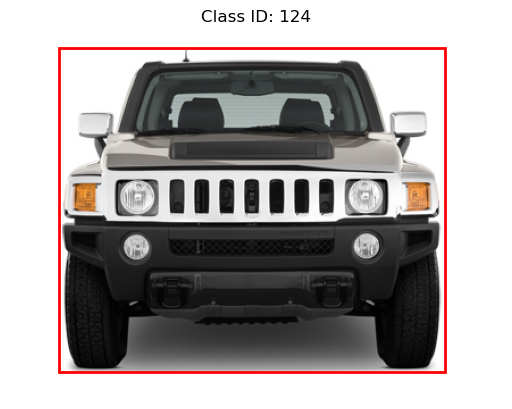

Class ID: 185
Class Name: Tesla Model S Sedan 2012


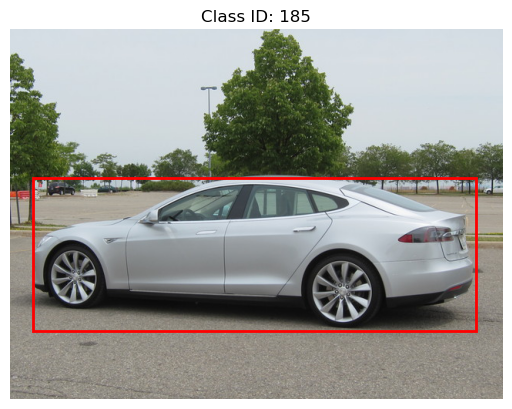

Class ID: 8
Class Name: Aston Martin V8 Vantage Convertible 2012


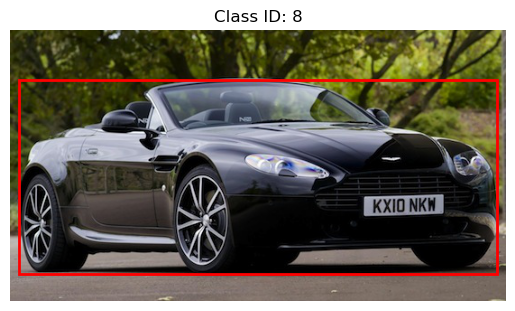

In [249]:
import random

bbox, class_id, class_name, image_name = getAnno(df_train, random.randint(0,8143))
displayAnno(bbox, class_id, class_name, image_name)

bbox, class_id, class_name, image_name = getAnno(df_train, random.randint(0,8143))
displayAnno(bbox, class_id, class_name, image_name)

bbox, class_id, class_name, image_name = getAnno(df_train, random.randint(0,8143))
displayAnno(bbox, class_id, class_name, image_name)

In [119]:
import os
import shutil
from PIL import Image

# Function to convert the training dataset to YOLO format
# YOLO needs the data in a specific format to train and test the model
def convert_to_yolo_format(df, image_folder, output_image_dir, output_label_dir):
    os.makedirs(output_image_dir, exist_ok=True)
    os.makedirs(output_label_dir, exist_ok=True)

    for i, row in df.iterrows():
        img_path = os.path.join(image_folder, row['image'])
        label_path = os.path.join(output_label_dir, os.path.splitext(row['image'])[0] + '.txt')

        # Copy image to YOLO folder
        shutil.copy(img_path, os.path.join(output_image_dir, row['image']))

        # Read image size
        with Image.open(img_path) as img:
            w, h = img.size

        # Convert box
        x_min, y_min, x_max, y_max = row['x1'], row['y1'], row['x2'], row['y2']
        x_center = ((x_min + x_max) / 2) / w
        y_center = ((y_min + y_max) / 2) / h
        box_width = (x_max - x_min) / w
        box_height = (y_max - y_min) / h

        # Write YOLO format label
        class_id = int(row['class']) - 1  # YOLO requires 0-based class IDs
        with open(label_path, 'w') as f:
            f.write(f"{class_id} {x_center:.6f} {y_center:.6f} {box_width:.6f} {box_height:.6f}\n")


In [123]:
# Convert them both for a train set and a test set
convert_to_yolo_format(df_train, train_folder, 'data/images/train', 'data/labels/train')
convert_to_yolo_format(df_test, test_folder, 'data/images/val', 'data/labels/val')


In [221]:
# Get sorted class name list by class ID
class_map = (
    df_train[['class', 'ture_class_name']]
    .drop_duplicates()
    .sort_values('class')
    .reset_index(drop=True)
)

# Convert to dictionary 
names_dict = {int(row['class']) - 1: row['ture_class_name'] for _, row in class_map.iterrows()}

In [223]:
import yaml

# YOLO needs a .yaml file that tells the model where the images are and where the class names are for training and validation
stanford_yaml = {
    'path': 'data',
    'train': 'images/train',
    'val': 'images/val',
    'names': names_dict
}

with open('stanford.yaml', 'w') as f:
    yaml.dump(stanford_yaml, f)


In [15]:
import os
# Start training the model with YOLO v8 for 50 epochs
# NEED THIS LINE
# vvvvvvvvvvvvv
os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"

from ultralytics import YOLO

# Load a pretrained model (you can use yolov8n.pt for speed, yolov8m.pt for balance, yolov8x.pt for accuracy)
model = YOLO("yolov8n.pt")

# Train on your custom Stanford Cars data
model.train(data="stanford.yaml", epochs=50, imgsz=640, batch=16, plots=False)


Ultralytics 8.3.121  Python-3.12.7 torch-2.7.0+cu128 CUDA:0 (NVIDIA GeForce RTX 3070 Ti, 8192MiB)
engine\trainer: task=detect, mode=train, model=yolov8n.pt, data=stanford.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train15, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=False, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_w

train: Scanning C:\Users\Ethan\OneDrive\Desktop\ECE 4990 Final Project\datasets\data\labels\train.cache... 8144 images, 0 backgrounds, 0 corrupt: 100%|██████████| 8144/8144 [00:00<?, ?it/s]


val: Fast image access  (ping: 0.10.0 ms, read: 438.3252.5 MB/s, size: 58.8 KB)


val: Scanning C:\Users\Ethan\OneDrive\Desktop\ECE 4990 Final Project\datasets\data\labels\val.cache... 8041 images, 0 backgrounds, 0 corrupt: 100%|██████████| 8041/8041 [00:00<?, ?it/s]


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=5e-05, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs\detect\train15
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50       2.7G     0.5538      4.986      1.139         49        640: 100%|██████████| 509/509 [01:07<00:00,  7.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:45<00:00,  5.51it/s]


                   all       8041       8041    0.00415      0.249    0.00374    0.00352

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      2.71G     0.4909      4.629      1.078         44        640: 100%|██████████| 509/509 [01:09<00:00,  7.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:43<00:00,  5.84it/s]


                   all       8041       8041    0.00548      0.725    0.00988    0.00923

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      2.73G     0.4939      4.299      1.076         39        640: 100%|██████████| 509/509 [01:03<00:00,  8.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:55<00:00,  4.51it/s]


                   all       8041       8041    0.00582      0.928     0.0173      0.016

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      2.74G     0.4874      3.996      1.065         41        640: 100%|██████████| 509/509 [01:06<00:00,  7.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:45<00:00,  5.54it/s]


                   all       8041       8041      0.108      0.204     0.0293     0.0269

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      2.74G     0.4745      3.752      1.051         42        640: 100%|██████████| 509/509 [01:06<00:00,  7.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:44<00:00,  5.64it/s]


                   all       8041       8041      0.335     0.0793     0.0461     0.0424

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      2.74G     0.4675      3.544      1.041         40        640: 100%|██████████| 509/509 [01:03<00:00,  8.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:50<00:00,  4.96it/s]


                   all       8041       8041      0.236      0.147     0.0885     0.0818

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      2.73G     0.4587      3.375      1.035         48        640: 100%|██████████| 509/509 [01:05<00:00,  7.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:46<00:00,  5.46it/s]


                   all       8041       8041      0.232      0.201      0.123      0.114

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      2.73G     0.4537      3.221      1.031         48        640: 100%|██████████| 509/509 [01:02<00:00,  8.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:41<00:00,  6.08it/s]


                   all       8041       8041      0.249      0.242      0.161       0.15

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      2.73G      0.449      3.095      1.028         37        640: 100%|██████████| 509/509 [00:59<00:00,  8.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:45<00:00,  5.56it/s]


                   all       8041       8041      0.236      0.296      0.206      0.191

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      2.73G     0.4428      2.987      1.024         36        640: 100%|██████████| 509/509 [01:00<00:00,  8.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:40<00:00,  6.19it/s]


                   all       8041       8041      0.258      0.351      0.246      0.229

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      2.73G     0.4427      2.889      1.023         46        640: 100%|██████████| 509/509 [01:00<00:00,  8.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:40<00:00,  6.28it/s]


                   all       8041       8041      0.288      0.378      0.291      0.272

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      2.73G     0.4397      2.817       1.02         50        640: 100%|██████████| 509/509 [00:59<00:00,  8.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:44<00:00,  5.71it/s]


                   all       8041       8041      0.331      0.415      0.331       0.31

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      2.73G     0.4345      2.725      1.014         54        640: 100%|██████████| 509/509 [00:59<00:00,  8.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:39<00:00,  6.33it/s]


                   all       8041       8041       0.34      0.441       0.37      0.346

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      2.72G     0.4377       2.66       1.02         36        640: 100%|██████████| 509/509 [00:59<00:00,  8.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:40<00:00,  6.29it/s]


                   all       8041       8041      0.391      0.458      0.418      0.391

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      2.72G     0.4322      2.587      1.015         45        640: 100%|██████████| 509/509 [00:59<00:00,  8.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:42<00:00,  5.89it/s]


                   all       8041       8041      0.391      0.473      0.421      0.394

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      2.72G     0.4333      2.514      1.016         46        640: 100%|██████████| 509/509 [00:59<00:00,  8.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:39<00:00,  6.37it/s]


                   all       8041       8041      0.438      0.524      0.482      0.452

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      2.72G     0.4324      2.448      1.015         43        640: 100%|██████████| 509/509 [00:58<00:00,  8.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:39<00:00,  6.46it/s]


                   all       8041       8041      0.459      0.529      0.506      0.474

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      2.72G     0.4295        2.4      1.014         39        640: 100%|██████████| 509/509 [00:58<00:00,  8.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:42<00:00,  6.00it/s]


                   all       8041       8041      0.484      0.561      0.535      0.502

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      2.72G     0.4273      2.333      1.009         40        640: 100%|██████████| 509/509 [00:59<00:00,  8.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:39<00:00,  6.40it/s]


                   all       8041       8041      0.506      0.554       0.55      0.516

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      2.72G     0.4223      2.282      1.009         42        640: 100%|██████████| 509/509 [00:59<00:00,  8.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:39<00:00,  6.33it/s]


                   all       8041       8041       0.53      0.576      0.577      0.541

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      2.72G     0.4198      2.227       1.01         44        640: 100%|██████████| 509/509 [00:59<00:00,  8.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:43<00:00,  5.78it/s]


                   all       8041       8041      0.558       0.59      0.606      0.569

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      2.72G     0.4214      2.177      1.007         41        640: 100%|██████████| 509/509 [00:59<00:00,  8.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:41<00:00,  6.13it/s]


                   all       8041       8041      0.569        0.6      0.623      0.585

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      2.72G     0.4191      2.152      1.006         41        640: 100%|██████████| 509/509 [01:00<00:00,  8.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:41<00:00,  6.06it/s]


                   all       8041       8041      0.587      0.612      0.639        0.6

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      2.72G     0.4162      2.093          1         45        640:  94%|█████████▎| 477/509 [00:56<00:03,  8.50it/s]


KeyboardInterrupt: 

In [9]:
import os

# Loads the last checkpoint of the model in case you needed to stop and can resume training
os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"

from ultralytics import YOLO

# Load the last checkpoint
# CHECK WHERE YOUR LATEST TRAINED MODEL IS
model = YOLO("runs/detect/train15/weights/last.pt")

# Resume training
model.train(resume=True)


Ultralytics 8.3.121  Python-3.12.7 torch-2.7.0+cu128 CUDA:0 (NVIDIA GeForce RTX 3070 Ti, 8192MiB)
engine\trainer: task=detect, mode=train, model=runs\detect\train15\weights\last.pt, data=stanford.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train15, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=runs\detect\train15\weights\last.pt, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=False, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, sh

train: Scanning C:\Users\Ethan\OneDrive\Desktop\ECE 4990 Final Project\datasets\data\labels\train.cache... 8144 images, 0 backgrounds, 0 corrupt: 100%|██████████| 8144/8144 [00:00<?, ?it/s]


val: Fast image access  (ping: 0.10.0 ms, read: 407.5230.7 MB/s, size: 58.8 KB)


val: Scanning C:\Users\Ethan\OneDrive\Desktop\ECE 4990 Final Project\datasets\data\labels\val.cache... 8041 images, 0 backgrounds, 0 corrupt: 100%|██████████| 8041/8041 [00:00<?, ?it/s]


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=5e-05, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Resuming training runs\detect\train15\weights\last.pt from epoch 24 to 50 total epochs
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs\detect\train15
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      2.75G     0.4182      2.114      1.004         49        640: 100%|██████████| 509/509 [01:00<00:00,  8.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:44<00:00,  5.66it/s]


                   all       8041       8041      0.607      0.629      0.656      0.616

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      2.77G     0.4128       2.05      1.001         44        640: 100%|██████████| 509/509 [01:05<00:00,  7.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:44<00:00,  5.65it/s]


                   all       8041       8041      0.623      0.628      0.669      0.629

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      2.77G     0.4108      2.023      1.001         39        640: 100%|██████████| 509/509 [01:05<00:00,  7.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:47<00:00,  5.28it/s]


                   all       8041       8041      0.643      0.624      0.682       0.64

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      2.77G     0.4112      1.987      1.003         41        640: 100%|██████████| 509/509 [01:06<00:00,  7.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:41<00:00,  6.02it/s]


                   all       8041       8041      0.627      0.653      0.691       0.65

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      2.77G     0.4068      1.948     0.9982         42        640: 100%|██████████| 509/509 [01:03<00:00,  7.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:43<00:00,  5.77it/s]


                   all       8041       8041      0.648      0.662      0.707      0.665

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      2.77G     0.4063      1.915      0.997         40        640: 100%|██████████| 509/509 [00:59<00:00,  8.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:51<00:00,  4.88it/s]


                   all       8041       8041      0.663      0.659      0.717      0.674

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      2.77G     0.4033      1.898     0.9961         48        640: 100%|██████████| 509/509 [00:58<00:00,  8.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:39<00:00,  6.39it/s]


                   all       8041       8041      0.658      0.673      0.722      0.678

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      2.77G     0.4006      1.866     0.9946         48        640: 100%|██████████| 509/509 [00:58<00:00,  8.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:39<00:00,  6.44it/s]


                   all       8041       8041      0.681      0.685      0.733      0.689

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      2.77G     0.4004      1.832     0.9945         37        640: 100%|██████████| 509/509 [00:59<00:00,  8.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:50<00:00,  4.99it/s]


                   all       8041       8041      0.684      0.681      0.736      0.692

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      2.77G     0.3982      1.814     0.9936         36        640: 100%|██████████| 509/509 [01:00<00:00,  8.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:38<00:00,  6.56it/s]


                   all       8041       8041      0.693      0.689      0.745      0.701

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      2.77G     0.3963      1.774     0.9918         46        640: 100%|██████████| 509/509 [00:59<00:00,  8.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:37<00:00,  6.67it/s]


                   all       8041       8041      0.695      0.691      0.746      0.701

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      2.77G     0.3982      1.773     0.9922         50        640: 100%|██████████| 509/509 [00:58<00:00,  8.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:42<00:00,  5.91it/s]


                   all       8041       8041      0.703      0.699      0.753      0.708

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      2.77G     0.3928      1.729     0.9876         54        640: 100%|██████████| 509/509 [00:58<00:00,  8.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:37<00:00,  6.64it/s]


                   all       8041       8041      0.703      0.709      0.761      0.715

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      2.77G     0.3954      1.727     0.9924         36        640: 100%|██████████| 509/509 [00:58<00:00,  8.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:38<00:00,  6.62it/s]


                   all       8041       8041      0.708      0.713      0.765      0.719

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      2.77G      0.392      1.705     0.9898         45        640: 100%|██████████| 509/509 [00:58<00:00,  8.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:42<00:00,  5.96it/s]


                   all       8041       8041      0.717      0.708      0.768      0.722

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      2.77G     0.3928      1.692     0.9901         46        640: 100%|██████████| 509/509 [00:59<00:00,  8.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:37<00:00,  6.65it/s]


                   all       8041       8041      0.723      0.708      0.771      0.725

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      2.77G     0.3934      1.672     0.9903         43        640: 100%|██████████| 509/509 [00:58<00:00,  8.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:37<00:00,  6.64it/s]


                   all       8041       8041      0.729      0.712      0.774      0.728
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      2.77G     0.3164      1.534     0.9569         16        640: 100%|██████████| 509/509 [00:57<00:00,  8.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:37<00:00,  6.69it/s]


                   all       8041       8041      0.686      0.694      0.747      0.701

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      2.77G     0.3073      1.394     0.9516         16        640: 100%|██████████| 509/509 [00:58<00:00,  8.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:37<00:00,  6.71it/s]


                   all       8041       8041       0.71      0.709      0.764      0.719

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      2.77G     0.3042      1.336     0.9494         16        640: 100%|██████████| 509/509 [00:57<00:00,  8.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:40<00:00,  6.27it/s]


                   all       8041       8041      0.708      0.724      0.773      0.727

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      2.76G     0.3039      1.306     0.9454         16        640: 100%|██████████| 509/509 [00:57<00:00,  8.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:36<00:00,  6.84it/s]


                   all       8041       8041      0.727      0.717      0.778      0.732

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      2.76G     0.3011      1.287     0.9435         16        640: 100%|██████████| 509/509 [00:56<00:00,  8.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:37<00:00,  6.80it/s]


                   all       8041       8041      0.747      0.718      0.786      0.739

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      2.76G     0.2996      1.261     0.9437         16        640: 100%|██████████| 509/509 [00:57<00:00,  8.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:39<00:00,  6.42it/s]


                   all       8041       8041      0.746      0.722      0.789      0.742

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      2.76G     0.2963      1.253     0.9387         16        640: 100%|██████████| 509/509 [00:57<00:00,  8.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:37<00:00,  6.74it/s]


                   all       8041       8041      0.753      0.722      0.792      0.745

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      2.76G     0.2976      1.226     0.9401         16        640: 100%|██████████| 509/509 [00:57<00:00,  8.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:37<00:00,  6.65it/s]


                   all       8041       8041      0.751      0.728      0.793      0.747

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      2.76G     0.2975      1.216     0.9439         16        640: 100%|██████████| 509/509 [00:57<00:00,  8.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:39<00:00,  6.40it/s]


                   all       8041       8041      0.756      0.722      0.795      0.749

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      2.76G     0.2959      1.202     0.9441         16        640: 100%|██████████| 509/509 [00:58<00:00,  8.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:36<00:00,  6.82it/s]


                   all       8041       8041      0.752      0.733      0.796      0.749

27 epochs completed in 0.770 hours.
Optimizer stripped from runs\detect\train15\weights\last.pt, 7.0MB
Optimizer stripped from runs\detect\train15\weights\best.pt, 7.0MB

Validating runs\detect\train15\weights\best.pt...
Ultralytics 8.3.121  Python-3.12.7 torch-2.7.0+cu128 CUDA:0 (NVIDIA GeForce RTX 3070 Ti, 8192MiB)
Model summary (fused): 72 layers, 3,369,812 parameters, 0 gradients, 9.8 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:28<00:00,  8.70it/s]


                   all       8041       8041       0.75      0.734      0.796      0.749
AM General Hummer SUV 2000         44         44      0.875      0.798      0.905      0.806
   Acura RL Sedan 2012         32         32       0.67       0.25      0.467      0.466
   Acura TL Sedan 2012         43         43      0.768      0.923      0.858      0.757
  Acura TL Type-S 2008         42         42      0.904      0.762      0.863       0.85
  Acura TSX Sedan 2012         40         40       0.84      0.659      0.796      0.778
Acura Integra Type R 2001         44         44       0.77       0.76      0.866      0.835
Acura ZDX Hatchback 2012         39         39      0.873      0.744       0.82      0.782
Aston Martin V8 Vantage Convertible 2012         45         45      0.486      0.556      0.454      0.408
Aston Martin V8 Vantage Coupe 2012         41         41      0.689      0.634      0.679      0.596
Aston Martin Virage Convertible 2012         33         33      0.415  

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,
        62,  63,  64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123,
       124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 1

In [12]:
import os

# Trained the model further for 200 epochs
os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"

from ultralytics import YOLO

# Load the last checkpoint
model = YOLO("runs/detect/train15/weights/last.pt")

# Start training
model.train(data="stanford.yaml", epochs=200, imgsz=640, batch=16, plots=False)

Ultralytics 8.3.121  Python-3.12.7 torch-2.7.0+cu128 CUDA:0 (NVIDIA GeForce RTX 3070 Ti, 8192MiB)
engine\trainer: task=detect, mode=train, model=runs/detect/train15/weights/last.pt, data=stanford.yaml, epochs=200, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train16, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=False, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=Tru

train: Scanning C:\Users\Ethan\OneDrive\Desktop\ECE 4990 Final Project\datasets\data\labels\train.cache... 8144 images, 0 backgrounds, 0 corrupt: 100%|██████████| 8144/8144 [00:00<?, ?it/s]


val: Fast image access  (ping: 0.00.0 ms, read: 692.3334.5 MB/s, size: 58.8 KB)


val: Scanning C:\Users\Ethan\OneDrive\Desktop\ECE 4990 Final Project\datasets\data\labels\val.cache... 8041 images, 0 backgrounds, 0 corrupt: 100%|██████████| 8041/8041 [00:00<?, ?it/s]


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs\detect\train16
Starting training for 200 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/200      2.78G     0.4292      1.838      1.004         49        640: 100%|██████████| 509/509 [01:02<00:00,  8.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:39<00:00,  6.35it/s]


                   all       8041       8041      0.556      0.558      0.584      0.539

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/200      2.71G     0.5066      2.107      1.043         44        640: 100%|██████████| 509/509 [01:05<00:00,  7.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:39<00:00,  6.42it/s]


                   all       8041       8041      0.391      0.423      0.361      0.318

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/200      2.72G     0.5882      2.443      1.088         39        640: 100%|██████████| 509/509 [01:04<00:00,  7.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:44<00:00,  5.69it/s]


                   all       8041       8041      0.326      0.402      0.299       0.26

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/200      2.72G     0.6343      2.566      1.118         41        640: 100%|██████████| 509/509 [01:02<00:00,  8.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:43<00:00,  5.73it/s]


                   all       8041       8041      0.343      0.392      0.318       0.28

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/200      2.71G      0.605      2.378      1.096         42        640: 100%|██████████| 509/509 [01:02<00:00,  8.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:42<00:00,  5.96it/s]


                   all       8041       8041      0.404       0.49      0.416       0.37

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/200      2.71G     0.5836      2.207      1.084         40        640: 100%|██████████| 509/509 [01:03<00:00,  8.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:45<00:00,  5.54it/s]


                   all       8041       8041      0.491      0.545      0.532      0.478

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/200      2.71G     0.5646      2.044      1.073         48        640: 100%|██████████| 509/509 [00:59<00:00,  8.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:41<00:00,  6.09it/s]


                   all       8041       8041      0.572      0.588      0.622      0.563

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/200      2.71G     0.5528      1.926       1.07         48        640: 100%|██████████| 509/509 [00:58<00:00,  8.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:37<00:00,  6.80it/s]


                   all       8041       8041       0.54      0.619      0.634      0.578

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/200      2.71G     0.5439      1.811      1.064         37        640: 100%|██████████| 509/509 [00:57<00:00,  8.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:39<00:00,  6.37it/s]


                   all       8041       8041      0.592       0.63      0.672      0.614

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/200      2.71G     0.5317      1.724      1.055         36        640: 100%|██████████| 509/509 [00:57<00:00,  8.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:37<00:00,  6.79it/s]


                   all       8041       8041      0.682      0.674      0.746      0.679

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/200      2.71G     0.5268      1.638      1.054         46        640: 100%|██████████| 509/509 [00:57<00:00,  8.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:38<00:00,  6.56it/s]


                   all       8041       8041      0.666      0.697      0.757      0.695

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/200      2.71G     0.5207      1.601      1.048         50        640: 100%|██████████| 509/509 [00:58<00:00,  8.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:40<00:00,  6.28it/s]


                   all       8041       8041      0.715      0.707       0.78      0.714

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/200      2.71G     0.5096      1.514      1.041         54        640: 100%|██████████| 509/509 [00:57<00:00,  8.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:37<00:00,  6.74it/s]


                   all       8041       8041      0.718      0.715      0.794       0.73

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/200      2.71G     0.5099      1.485      1.045         36        640: 100%|██████████| 509/509 [00:57<00:00,  8.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:37<00:00,  6.65it/s]


                   all       8041       8041      0.742      0.729      0.808      0.742

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/200      2.71G     0.5026       1.43      1.041         45        640: 100%|██████████| 509/509 [00:57<00:00,  8.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:39<00:00,  6.36it/s]


                   all       8041       8041      0.768      0.734      0.827      0.761

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/200      2.71G     0.5008      1.393      1.039         46        640: 100%|██████████| 509/509 [00:57<00:00,  8.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:37<00:00,  6.75it/s]


                   all       8041       8041      0.755      0.748      0.832      0.769

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/200      2.71G     0.4992      1.366      1.039         43        640: 100%|██████████| 509/509 [00:57<00:00,  8.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:37<00:00,  6.75it/s]


                   all       8041       8041      0.773      0.773      0.848      0.786

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/200      2.71G     0.4908      1.331      1.034         39        640: 100%|██████████| 509/509 [00:57<00:00,  8.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:38<00:00,  6.53it/s]


                   all       8041       8041      0.776      0.774      0.849      0.783

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/200      2.71G      0.488      1.304       1.03         40        640: 100%|██████████| 509/509 [00:57<00:00,  8.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:37<00:00,  6.72it/s]


                   all       8041       8041      0.797      0.776      0.859      0.793

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/200      2.71G     0.4824      1.273       1.03         42        640: 100%|██████████| 509/509 [00:57<00:00,  8.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:37<00:00,  6.77it/s]


                   all       8041       8041      0.808       0.81      0.879      0.812

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/200      2.71G     0.4764      1.244      1.027         44        640: 100%|██████████| 509/509 [00:57<00:00,  8.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:39<00:00,  6.45it/s]

                   all       8041       8041      0.798      0.801       0.87      0.809



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/200      2.71G     0.4779       1.22      1.026         41        640: 100%|██████████| 509/509 [00:57<00:00,  8.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:36<00:00,  6.81it/s]


                   all       8041       8041      0.827      0.815      0.887      0.823

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/200      2.71G     0.4721      1.207      1.024         41        640: 100%|██████████| 509/509 [00:57<00:00,  8.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:37<00:00,  6.80it/s]


                   all       8041       8041      0.816      0.821      0.886      0.824

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/200      2.71G     0.4673      1.161      1.016         50        640: 100%|██████████| 509/509 [00:57<00:00,  8.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:38<00:00,  6.60it/s]


                   all       8041       8041      0.816      0.829       0.89      0.827

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/200      2.71G      0.471       1.15      1.021         45        640: 100%|██████████| 509/509 [00:57<00:00,  8.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:36<00:00,  6.86it/s]


                   all       8041       8041      0.836      0.823      0.896      0.832

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/200      2.71G     0.4646      1.116      1.017         46        640: 100%|██████████| 509/509 [00:57<00:00,  8.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:37<00:00,  6.78it/s]


                   all       8041       8041      0.832      0.823      0.897      0.835

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/200      2.71G     0.4686      1.117      1.021         43        640: 100%|██████████| 509/509 [00:57<00:00,  8.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:38<00:00,  6.54it/s]

                   all       8041       8041       0.84      0.839        0.9      0.837



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/200      2.71G      0.466      1.097      1.019         45        640: 100%|██████████| 509/509 [00:57<00:00,  8.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:37<00:00,  6.79it/s]


                   all       8041       8041      0.842      0.834        0.9      0.838

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/200      2.71G     0.4648      1.101      1.022         42        640: 100%|██████████| 509/509 [00:57<00:00,  8.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:36<00:00,  6.82it/s]


                   all       8041       8041      0.842      0.856      0.909      0.848

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/200      2.71G     0.4639      1.084       1.02         46        640: 100%|██████████| 509/509 [00:57<00:00,  8.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:38<00:00,  6.54it/s]

                   all       8041       8041      0.867      0.837      0.913      0.852



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/200      2.71G      0.456      1.059      1.016         38        640: 100%|██████████| 509/509 [00:57<00:00,  8.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:37<00:00,  6.78it/s]


                   all       8041       8041      0.876      0.836      0.915      0.855

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/200      2.71G     0.4603      1.054      1.016         49        640: 100%|██████████| 509/509 [00:57<00:00,  8.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:37<00:00,  6.80it/s]


                   all       8041       8041      0.871      0.852      0.917      0.856

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/200      2.71G     0.4527      1.035      1.014         44        640: 100%|██████████| 509/509 [00:57<00:00,  8.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:38<00:00,  6.57it/s]


                   all       8041       8041      0.861      0.859      0.919       0.86

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/200       2.7G     0.4529      1.022      1.011         44        640: 100%|██████████| 509/509 [00:57<00:00,  8.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:36<00:00,  6.88it/s]


                   all       8041       8041      0.865      0.862      0.921      0.862

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/200      2.71G     0.4508      1.003      1.012         39        640: 100%|██████████| 509/509 [00:57<00:00,  8.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:36<00:00,  6.82it/s]


                   all       8041       8041      0.859      0.866      0.923      0.863

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/200       2.7G     0.4492     0.9913       1.01         45        640: 100%|██████████| 509/509 [00:57<00:00,  8.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:38<00:00,  6.57it/s]


                   all       8041       8041      0.873      0.869      0.928      0.869

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/200      2.71G      0.449     0.9797      1.008         44        640: 100%|██████████| 509/509 [00:57<00:00,  8.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:37<00:00,  6.79it/s]


                   all       8041       8041      0.872      0.864      0.925      0.866

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/200       2.7G     0.4483     0.9877      1.009         44        640: 100%|██████████| 509/509 [00:57<00:00,  8.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:36<00:00,  6.84it/s]


                   all       8041       8041      0.878      0.876      0.928       0.87

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/200      2.71G      0.451     0.9714      1.007         45        640: 100%|██████████| 509/509 [00:57<00:00,  8.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:38<00:00,  6.55it/s]


                   all       8041       8041      0.876      0.877      0.927       0.87

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/200      2.71G     0.4484     0.9773      1.009         45        640: 100%|██████████| 509/509 [00:57<00:00,  8.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:37<00:00,  6.80it/s]


                   all       8041       8041      0.889      0.873       0.93      0.871

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/200      2.71G     0.4438     0.9499      1.007         46        640: 100%|██████████| 509/509 [00:57<00:00,  8.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:37<00:00,  6.76it/s]


                   all       8041       8041      0.898      0.872      0.932      0.874

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/200      2.71G     0.4432     0.9507      1.008         39        640: 100%|██████████| 509/509 [00:57<00:00,  8.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:38<00:00,  6.54it/s]


                   all       8041       8041      0.896      0.873      0.932      0.875

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/200      2.71G     0.4419       0.93      1.007         40        640: 100%|██████████| 509/509 [00:57<00:00,  8.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:36<00:00,  6.88it/s]


                   all       8041       8041      0.895      0.881      0.934      0.877

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/200      2.71G     0.4429      0.939      1.009         43        640: 100%|██████████| 509/509 [00:57<00:00,  8.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:36<00:00,  6.83it/s]


                   all       8041       8041      0.893      0.875      0.933      0.876

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/200      2.71G     0.4427     0.9161      1.005         42        640: 100%|██████████| 509/509 [00:57<00:00,  8.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:38<00:00,  6.62it/s]


                   all       8041       8041      0.901      0.889      0.936      0.878

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/200       2.7G     0.4398     0.9102      1.005         52        640: 100%|██████████| 509/509 [00:57<00:00,  8.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:37<00:00,  6.72it/s]


                   all       8041       8041      0.887      0.898      0.936      0.878

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/200      2.71G     0.4402     0.9061      1.006         48        640: 100%|██████████| 509/509 [00:57<00:00,  8.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:37<00:00,  6.79it/s]


                   all       8041       8041      0.902      0.888      0.937      0.878

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/200      2.71G     0.4382     0.9045      1.003         43        640: 100%|██████████| 509/509 [00:57<00:00,  8.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:38<00:00,  6.57it/s]


                   all       8041       8041      0.906      0.885      0.939      0.881

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/200      2.71G      0.437     0.8991      1.003         43        640: 100%|██████████| 509/509 [00:58<00:00,  8.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:37<00:00,  6.75it/s]


                   all       8041       8041      0.911      0.889      0.939      0.882

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/200       2.7G     0.4373     0.9028      1.003         41        640: 100%|██████████| 509/509 [00:57<00:00,  8.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:36<00:00,  6.82it/s]


                   all       8041       8041      0.896      0.892      0.938      0.882

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/200       2.7G     0.4339     0.8759     0.9997         54        640: 100%|██████████| 509/509 [00:57<00:00,  8.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:38<00:00,  6.50it/s]

                   all       8041       8041      0.903      0.894      0.943      0.886



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/200       2.7G     0.4348      0.877      1.002         40        640: 100%|██████████| 509/509 [00:57<00:00,  8.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:37<00:00,  6.79it/s]


                   all       8041       8041      0.905        0.9      0.943      0.886

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/200      2.71G     0.4306     0.8736     0.9995         43        640: 100%|██████████| 509/509 [00:57<00:00,  8.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:37<00:00,  6.80it/s]


                   all       8041       8041      0.908      0.899      0.945      0.889

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/200       2.7G     0.4323     0.8688     0.9993         38        640: 100%|██████████| 509/509 [00:57<00:00,  8.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:39<00:00,  6.41it/s]

                   all       8041       8041      0.906      0.905      0.944      0.889



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/200      2.71G     0.4274     0.8599     0.9991         38        640: 100%|██████████| 509/509 [00:57<00:00,  8.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:37<00:00,  6.80it/s]


                   all       8041       8041      0.911      0.898      0.945      0.889

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/200      2.71G     0.4284     0.8447     0.9979         44        640: 100%|██████████| 509/509 [00:57<00:00,  8.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:37<00:00,  6.72it/s]


                   all       8041       8041      0.906      0.911      0.945      0.891

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/200      2.71G     0.4271     0.8446     0.9966         42        640: 100%|██████████| 509/509 [00:57<00:00,  8.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:39<00:00,  6.46it/s]

                   all       8041       8041       0.92      0.906      0.948      0.893



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/200       2.7G     0.4278     0.8391     0.9988         36        640: 100%|██████████| 509/509 [00:57<00:00,  8.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:36<00:00,  6.81it/s]


                   all       8041       8041      0.925      0.907      0.949      0.893

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/200       2.7G     0.4259     0.8321     0.9941         41        640: 100%|██████████| 509/509 [00:57<00:00,  8.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:37<00:00,  6.81it/s]


                   all       8041       8041       0.91      0.912      0.947      0.892

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/200       2.7G      0.424     0.8279     0.9944         49        640: 100%|██████████| 509/509 [00:57<00:00,  8.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:38<00:00,  6.48it/s]

                   all       8041       8041      0.909      0.913      0.948      0.894



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/200       2.7G     0.4272      0.834     0.9971         45        640: 100%|██████████| 509/509 [00:57<00:00,  8.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:37<00:00,  6.77it/s]


                   all       8041       8041      0.911      0.906      0.948      0.893

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/200       2.7G     0.4249     0.8199     0.9946         45        640: 100%|██████████| 509/509 [00:57<00:00,  8.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:36<00:00,  6.83it/s]


                   all       8041       8041      0.915      0.908      0.948      0.893

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/200       2.7G     0.4209     0.8138      0.996         46        640: 100%|██████████| 509/509 [00:57<00:00,  8.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:38<00:00,  6.52it/s]

                   all       8041       8041      0.909      0.914      0.948      0.894



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/200      2.71G     0.4229     0.8155     0.9966         41        640: 100%|██████████| 509/509 [00:57<00:00,  8.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:36<00:00,  6.83it/s]


                   all       8041       8041      0.915      0.912      0.949      0.894

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/200       2.7G     0.4218      0.808     0.9928         49        640: 100%|██████████| 509/509 [00:57<00:00,  8.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:37<00:00,  6.80it/s]


                   all       8041       8041      0.919      0.913      0.951      0.896

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/200       2.7G     0.4215     0.8127     0.9946         52        640: 100%|██████████| 509/509 [00:57<00:00,  8.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:39<00:00,  6.45it/s]

                   all       8041       8041      0.912      0.919      0.951      0.897



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/200       2.7G     0.4199     0.8034     0.9944         46        640: 100%|██████████| 509/509 [00:57<00:00,  8.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:36<00:00,  6.83it/s]


                   all       8041       8041      0.912       0.92      0.952      0.898

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/200       2.7G     0.4189     0.7824     0.9896         38        640: 100%|██████████| 509/509 [00:57<00:00,  8.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:37<00:00,  6.75it/s]


                   all       8041       8041      0.914      0.916       0.95      0.896

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/200      2.71G     0.4208     0.7903     0.9933         38        640: 100%|██████████| 509/509 [00:57<00:00,  8.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:38<00:00,  6.50it/s]

                   all       8041       8041      0.916      0.919      0.951      0.897



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/200       2.7G     0.4225     0.7822     0.9933         46        640: 100%|██████████| 509/509 [00:57<00:00,  8.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:36<00:00,  6.81it/s]


                   all       8041       8041      0.925      0.916      0.951      0.898

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/200       2.7G     0.4196     0.7796     0.9957         43        640: 100%|██████████| 509/509 [00:57<00:00,  8.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:37<00:00,  6.73it/s]

                   all       8041       8041       0.92      0.919      0.952      0.899



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/200       2.7G     0.4225     0.7832     0.9972         45        640: 100%|██████████| 509/509 [00:57<00:00,  8.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:38<00:00,  6.59it/s]

                   all       8041       8041       0.92      0.919      0.953        0.9



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/200       2.7G     0.4161      0.765     0.9909         48        640: 100%|██████████| 509/509 [00:57<00:00,  8.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:36<00:00,  6.85it/s]


                   all       8041       8041      0.919      0.919      0.952        0.9

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/200       2.7G     0.4153     0.7613     0.9905         47        640: 100%|██████████| 509/509 [00:57<00:00,  8.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:36<00:00,  6.81it/s]


                   all       8041       8041      0.928      0.909      0.951      0.899

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/200       2.7G     0.4117     0.7579     0.9915         48        640: 100%|██████████| 509/509 [00:57<00:00,  8.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:39<00:00,  6.45it/s]

                   all       8041       8041      0.921      0.912      0.951      0.898



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/200      2.71G     0.4132      0.753     0.9886         48        640: 100%|██████████| 509/509 [00:57<00:00,  8.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:37<00:00,  6.76it/s]


                   all       8041       8041      0.922      0.917      0.952      0.899

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/200       2.7G     0.4136     0.7606     0.9896         45        640: 100%|██████████| 509/509 [00:57<00:00,  8.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:37<00:00,  6.79it/s]

                   all       8041       8041      0.924       0.92      0.953      0.901



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/200       2.7G     0.4113      0.748     0.9871         41        640: 100%|██████████| 509/509 [00:57<00:00,  8.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:39<00:00,  6.45it/s]

                   all       8041       8041      0.921      0.919      0.954      0.902



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/200       2.7G     0.4156     0.7509     0.9929         51        640: 100%|██████████| 509/509 [00:57<00:00,  8.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:36<00:00,  6.91it/s]


                   all       8041       8041      0.922      0.921      0.955      0.902

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/200       2.7G     0.4115     0.7416     0.9883         44        640: 100%|██████████| 509/509 [00:57<00:00,  8.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:36<00:00,  6.82it/s]


                   all       8041       8041      0.922      0.923      0.954      0.902

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/200       2.7G     0.4123     0.7419     0.9895         50        640: 100%|██████████| 509/509 [00:57<00:00,  8.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:38<00:00,  6.49it/s]


                   all       8041       8041      0.927      0.919      0.954      0.902

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/200       2.7G     0.4112     0.7381     0.9897         43        640: 100%|██████████| 509/509 [00:57<00:00,  8.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:37<00:00,  6.77it/s]


                   all       8041       8041      0.929      0.916      0.954      0.903

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/200      2.71G     0.4092      0.727     0.9885         47        640: 100%|██████████| 509/509 [00:57<00:00,  8.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:37<00:00,  6.78it/s]


                   all       8041       8041      0.923      0.924      0.955      0.903

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/200       2.7G     0.4117     0.7373     0.9906         47        640: 100%|██████████| 509/509 [00:57<00:00,  8.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:38<00:00,  6.55it/s]


                   all       8041       8041      0.925      0.922      0.954      0.902

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/200       2.7G     0.4112     0.7267     0.9896         45        640: 100%|██████████| 509/509 [00:57<00:00,  8.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:37<00:00,  6.66it/s]

                   all       8041       8041      0.927      0.921      0.955      0.902



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/200       2.7G     0.4067     0.7312     0.9906         45        640: 100%|██████████| 509/509 [00:57<00:00,  8.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:37<00:00,  6.64it/s]

                   all       8041       8041      0.922      0.926      0.954      0.901



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/200       2.7G     0.4057       0.72     0.9868         43        640: 100%|██████████| 509/509 [00:57<00:00,  8.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:39<00:00,  6.32it/s]

                   all       8041       8041      0.932       0.92      0.954      0.903



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/200      2.71G     0.4107     0.7151     0.9875         44        640: 100%|██████████| 509/509 [00:57<00:00,  8.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:36<00:00,  6.83it/s]


                   all       8041       8041      0.931      0.921      0.954      0.903

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/200      2.71G     0.4054     0.7134     0.9873         43        640: 100%|██████████| 509/509 [00:57<00:00,  8.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:37<00:00,  6.78it/s]


                   all       8041       8041      0.925      0.927      0.955      0.903

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/200       2.7G     0.4079     0.7121     0.9875         48        640: 100%|██████████| 509/509 [00:57<00:00,  8.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:38<00:00,  6.60it/s]


                   all       8041       8041      0.927      0.926      0.955      0.903

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/200       2.7G     0.4042     0.7048     0.9838         46        640: 100%|██████████| 509/509 [00:57<00:00,  8.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:36<00:00,  6.84it/s]


                   all       8041       8041      0.926      0.925      0.954      0.903

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/200       2.7G     0.4038     0.7023     0.9838         45        640: 100%|██████████| 509/509 [00:57<00:00,  8.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:37<00:00,  6.81it/s]


                   all       8041       8041      0.932      0.921      0.954      0.903

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/200       2.7G     0.4054     0.6876     0.9864         44        640: 100%|██████████| 509/509 [00:57<00:00,  8.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:39<00:00,  6.41it/s]

                   all       8041       8041      0.927      0.924      0.954      0.902



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/200       2.7G     0.4048     0.7029     0.9866         47        640: 100%|██████████| 509/509 [00:57<00:00,  8.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:36<00:00,  6.90it/s]


                   all       8041       8041      0.931      0.922      0.954      0.903

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/200       2.7G     0.4021     0.6919     0.9805         44        640: 100%|██████████| 509/509 [00:57<00:00,  8.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:36<00:00,  6.88it/s]


                   all       8041       8041      0.925      0.926      0.954      0.903

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/200       2.7G     0.3993      0.683     0.9834         39        640: 100%|██████████| 509/509 [00:57<00:00,  8.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:38<00:00,  6.52it/s]


                   all       8041       8041       0.92      0.928      0.954      0.903

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/200       2.7G     0.3952     0.6764     0.9793         47        640: 100%|██████████| 509/509 [00:57<00:00,  8.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:36<00:00,  6.83it/s]


                   all       8041       8041      0.928      0.921      0.954      0.903

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/200       2.7G      0.399     0.6929     0.9845         37        640: 100%|██████████| 509/509 [00:57<00:00,  8.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:36<00:00,  6.89it/s]


                   all       8041       8041      0.925      0.926      0.954      0.903

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/200       2.7G     0.3993     0.6831     0.9822         48        640: 100%|██████████| 509/509 [00:57<00:00,  8.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:39<00:00,  6.35it/s]

                   all       8041       8041      0.926      0.926      0.954      0.903



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/200       2.7G     0.3984     0.6795      0.985         40        640: 100%|██████████| 509/509 [00:57<00:00,  8.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:36<00:00,  6.88it/s]

                   all       8041       8041      0.929      0.924      0.954      0.903



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/200       2.7G     0.4002     0.6793     0.9845         47        640: 100%|██████████| 509/509 [00:57<00:00,  8.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:36<00:00,  6.84it/s]


                   all       8041       8041      0.926      0.927      0.954      0.904

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/200       2.7G     0.3972     0.6659     0.9816         47        640: 100%|██████████| 509/509 [00:57<00:00,  8.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:38<00:00,  6.60it/s]


                   all       8041       8041      0.926      0.926      0.954      0.904

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/200       2.7G     0.3936     0.6689     0.9799         47        640: 100%|██████████| 509/509 [00:57<00:00,  8.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:36<00:00,  6.90it/s]


                   all       8041       8041      0.923      0.926      0.954      0.904

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/200       2.7G     0.3957     0.6583     0.9788         47        640: 100%|██████████| 509/509 [00:57<00:00,  8.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:36<00:00,  6.83it/s]


                   all       8041       8041      0.924      0.928      0.954      0.904

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/200      2.71G     0.3946     0.6572       0.98         43        640: 100%|██████████| 509/509 [00:57<00:00,  8.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:39<00:00,  6.45it/s]


                   all       8041       8041      0.929      0.925      0.954      0.904

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/200       2.7G     0.3943     0.6564       0.98         45        640: 100%|██████████| 509/509 [00:57<00:00,  8.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:36<00:00,  6.83it/s]

                   all       8041       8041      0.929      0.926      0.954      0.903



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/200       2.7G     0.3998     0.6553     0.9846         39        640: 100%|██████████| 509/509 [00:57<00:00,  8.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:37<00:00,  6.79it/s]


                   all       8041       8041      0.932      0.923      0.954      0.904

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/200      2.71G     0.3934     0.6488     0.9774         50        640: 100%|██████████| 509/509 [00:57<00:00,  8.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:38<00:00,  6.56it/s]


                   all       8041       8041      0.929      0.926      0.955      0.904

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/200       2.7G     0.3937     0.6539       0.98         45        640: 100%|██████████| 509/509 [00:57<00:00,  8.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:36<00:00,  6.89it/s]

                   all       8041       8041      0.931      0.924      0.955      0.904



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/200       2.7G     0.3901     0.6515     0.9783         43        640: 100%|██████████| 509/509 [00:57<00:00,  8.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:36<00:00,  6.86it/s]

                   all       8041       8041      0.933      0.923      0.955      0.904



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/200       2.7G     0.3933     0.6433     0.9797         45        640: 100%|██████████| 509/509 [00:57<00:00,  8.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:38<00:00,  6.54it/s]


                   all       8041       8041      0.934      0.922      0.955      0.905

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/200       2.7G     0.3933     0.6427     0.9792         38        640: 100%|██████████| 509/509 [00:57<00:00,  8.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:36<00:00,  6.85it/s]

                   all       8041       8041      0.932      0.924      0.955      0.905



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/200      2.71G     0.3917     0.6399      0.977         43        640: 100%|██████████| 509/509 [00:57<00:00,  8.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:36<00:00,  6.85it/s]

                   all       8041       8041      0.934      0.922      0.955      0.905



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/200       2.7G     0.3856     0.6341     0.9777         45        640: 100%|██████████| 509/509 [00:57<00:00,  8.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:38<00:00,  6.56it/s]


                   all       8041       8041      0.933      0.923      0.955      0.905

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/200       2.7G      0.391     0.6242     0.9769         47        640: 100%|██████████| 509/509 [00:57<00:00,  8.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:36<00:00,  6.92it/s]

                   all       8041       8041      0.934      0.922      0.955      0.905



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/200      2.71G      0.389     0.6257     0.9797         46        640: 100%|██████████| 509/509 [00:57<00:00,  8.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:36<00:00,  6.86it/s]

                   all       8041       8041      0.933      0.924      0.955      0.905



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/200       2.7G     0.3901     0.6329     0.9796         46        640: 100%|██████████| 509/509 [00:57<00:00,  8.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:38<00:00,  6.57it/s]


                   all       8041       8041      0.932      0.925      0.955      0.905

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/200       2.7G     0.3874     0.6306     0.9768         46        640: 100%|██████████| 509/509 [00:57<00:00,  8.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:36<00:00,  6.88it/s]

                   all       8041       8041      0.932      0.925      0.955      0.905



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/200       2.7G     0.3856     0.6181      0.974         43        640: 100%|██████████| 509/509 [00:57<00:00,  8.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:36<00:00,  6.85it/s]

                   all       8041       8041      0.931      0.927      0.955      0.905



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/200      2.71G     0.3858     0.6178     0.9767         42        640: 100%|██████████| 509/509 [00:57<00:00,  8.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:38<00:00,  6.53it/s]


                   all       8041       8041      0.931      0.926      0.955      0.905

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/200       2.7G     0.3867     0.6211     0.9734         45        640: 100%|██████████| 509/509 [00:57<00:00,  8.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:37<00:00,  6.76it/s]

                   all       8041       8041       0.93      0.928      0.955      0.906



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/200       2.7G     0.3845     0.6033     0.9743         39        640: 100%|██████████| 509/509 [00:57<00:00,  8.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:36<00:00,  6.88it/s]


                   all       8041       8041      0.931      0.928      0.955      0.906

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/200       2.7G     0.3854     0.6113     0.9737         46        640: 100%|██████████| 509/509 [00:57<00:00,  8.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:38<00:00,  6.58it/s]


                   all       8041       8041      0.934      0.925      0.955      0.906

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/200       2.7G     0.3819      0.606     0.9746         48        640: 100%|██████████| 509/509 [00:57<00:00,  8.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:37<00:00,  6.65it/s]

                   all       8041       8041      0.932      0.926      0.955      0.906



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/200      2.71G     0.3802     0.5993     0.9734         52        640: 100%|██████████| 509/509 [00:57<00:00,  8.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:36<00:00,  6.86it/s]


                   all       8041       8041      0.932      0.928      0.955      0.906

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/200       2.7G     0.3796     0.5974     0.9727         45        640: 100%|██████████| 509/509 [00:57<00:00,  8.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:38<00:00,  6.56it/s]


                   all       8041       8041      0.931      0.929      0.955      0.906

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/200       2.7G     0.3831     0.5993     0.9741         49        640: 100%|██████████| 509/509 [00:57<00:00,  8.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:36<00:00,  6.86it/s]

                   all       8041       8041       0.93       0.93      0.955      0.906



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/200       2.7G     0.3801     0.5954     0.9725         56        640: 100%|██████████| 509/509 [00:57<00:00,  8.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:37<00:00,  6.78it/s]


                   all       8041       8041      0.931       0.93      0.955      0.906

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/200       2.7G     0.3798     0.5804     0.9705         42        640: 100%|██████████| 509/509 [00:57<00:00,  8.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:39<00:00,  6.39it/s]

                   all       8041       8041      0.931      0.929      0.955      0.906



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/200       2.7G     0.3764     0.5991     0.9714         49        640: 100%|██████████| 509/509 [00:57<00:00,  8.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:37<00:00,  6.80it/s]


                   all       8041       8041      0.931      0.929      0.955      0.906

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    131/200       2.7G     0.3773     0.5789     0.9689         40        640: 100%|██████████| 509/509 [00:57<00:00,  8.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:36<00:00,  6.88it/s]


                   all       8041       8041      0.932      0.928      0.956      0.906

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    132/200      2.71G     0.3781     0.5908     0.9724         40        640: 100%|██████████| 509/509 [00:57<00:00,  8.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:38<00:00,  6.51it/s]


                   all       8041       8041      0.932      0.928      0.956      0.906

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    133/200       2.7G     0.3773     0.5838     0.9698         51        640: 100%|██████████| 509/509 [00:57<00:00,  8.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:36<00:00,  6.87it/s]


                   all       8041       8041      0.932      0.928      0.956      0.906

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    134/200       2.7G     0.3751     0.5809     0.9697         41        640: 100%|██████████| 509/509 [00:57<00:00,  8.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:36<00:00,  6.88it/s]


                   all       8041       8041      0.934      0.926      0.956      0.906

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    135/200       2.7G     0.3738     0.5719     0.9695         44        640: 100%|██████████| 509/509 [00:57<00:00,  8.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:38<00:00,  6.63it/s]


                   all       8041       8041      0.934      0.926      0.956      0.906

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    136/200       2.7G     0.3748      0.565     0.9683         50        640: 100%|██████████| 509/509 [00:57<00:00,  8.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:36<00:00,  6.90it/s]

                   all       8041       8041      0.936      0.924      0.956      0.906



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    137/200       2.7G      0.376     0.5696     0.9683         43        640: 100%|██████████| 509/509 [00:57<00:00,  8.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:36<00:00,  6.86it/s]


                   all       8041       8041      0.935      0.925      0.956      0.906

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    138/200       2.7G     0.3752     0.5699     0.9708         34        640: 100%|██████████| 509/509 [00:57<00:00,  8.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:38<00:00,  6.50it/s]


                   all       8041       8041      0.936      0.925      0.956      0.906

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    139/200       2.7G     0.3727      0.561     0.9689         44        640: 100%|██████████| 509/509 [00:57<00:00,  8.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:37<00:00,  6.76it/s]

                   all       8041       8041      0.935      0.926      0.956      0.906



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    140/200       2.7G     0.3796     0.5597      0.974         48        640: 100%|██████████| 509/509 [00:57<00:00,  8.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:36<00:00,  6.91it/s]


                   all       8041       8041      0.936      0.925      0.956      0.907

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    141/200      2.71G     0.3759     0.5669     0.9669         45        640: 100%|██████████| 509/509 [00:57<00:00,  8.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:38<00:00,  6.55it/s]


                   all       8041       8041      0.935      0.925      0.956      0.907

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    142/200       2.7G     0.3717     0.5602     0.9687         37        640: 100%|██████████| 509/509 [00:57<00:00,  8.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:36<00:00,  6.83it/s]


                   all       8041       8041      0.936      0.925      0.956      0.906

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    143/200       2.7G     0.3716     0.5685     0.9705         48        640: 100%|██████████| 509/509 [00:57<00:00,  8.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:36<00:00,  6.87it/s]


                   all       8041       8041      0.935      0.925      0.956      0.907

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    144/200       2.7G     0.3717     0.5507     0.9687         49        640: 100%|██████████| 509/509 [00:57<00:00,  8.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:39<00:00,  6.42it/s]


                   all       8041       8041      0.934      0.925      0.956      0.907

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    145/200       2.7G     0.3687     0.5429     0.9675         38        640: 100%|██████████| 509/509 [00:57<00:00,  8.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:36<00:00,  6.88it/s]

                   all       8041       8041      0.935      0.925      0.956      0.907



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    146/200       2.7G     0.3722     0.5478     0.9709         45        640: 100%|██████████| 509/509 [00:57<00:00,  8.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:36<00:00,  6.85it/s]


                   all       8041       8041      0.933      0.927      0.956      0.907

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    147/200       2.7G     0.3703       0.55     0.9667         43        640: 100%|██████████| 509/509 [00:57<00:00,  8.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:37<00:00,  6.64it/s]


                   all       8041       8041      0.933      0.926      0.956      0.907

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    148/200      2.71G     0.3627      0.534     0.9624         47        640: 100%|██████████| 509/509 [00:57<00:00,  8.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:36<00:00,  6.82it/s]


                   all       8041       8041      0.933      0.926      0.956      0.907

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    149/200       2.7G     0.3672      0.547     0.9663         48        640: 100%|██████████| 509/509 [00:57<00:00,  8.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:36<00:00,  6.85it/s]


                   all       8041       8041      0.934      0.925      0.956      0.907

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    150/200       2.7G     0.3697     0.5459     0.9678         41        640: 100%|██████████| 509/509 [00:57<00:00,  8.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:38<00:00,  6.47it/s]


                   all       8041       8041      0.934      0.924      0.956      0.907

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    151/200       2.7G     0.3661      0.534     0.9671         47        640: 100%|██████████| 509/509 [00:57<00:00,  8.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:36<00:00,  6.88it/s]


                   all       8041       8041      0.935      0.923      0.956      0.907

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    152/200      2.71G     0.3661      0.537     0.9655         45        640: 100%|██████████| 509/509 [00:57<00:00,  8.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:36<00:00,  6.84it/s]

                   all       8041       8041      0.934      0.924      0.956      0.907



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    153/200       2.7G      0.364     0.5324     0.9649         37        640: 100%|██████████| 509/509 [00:57<00:00,  8.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:39<00:00,  6.39it/s]


                   all       8041       8041      0.932      0.926      0.956      0.907

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    154/200       2.7G     0.3635     0.5253     0.9632         50        640: 100%|██████████| 509/509 [00:57<00:00,  8.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:36<00:00,  6.85it/s]


                   all       8041       8041      0.932      0.926      0.956      0.907

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    155/200       2.7G     0.3642     0.5295     0.9631         42        640: 100%|██████████| 509/509 [00:57<00:00,  8.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:36<00:00,  6.89it/s]


                   all       8041       8041      0.932      0.926      0.956      0.907

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    156/200       2.7G     0.3615     0.5281     0.9625         44        640: 100%|██████████| 509/509 [00:57<00:00,  8.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:39<00:00,  6.45it/s]


                   all       8041       8041      0.932      0.926      0.956      0.907

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    157/200       2.7G     0.3599     0.5182     0.9593         46        640: 100%|██████████| 509/509 [00:57<00:00,  8.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:36<00:00,  6.87it/s]

                   all       8041       8041      0.933      0.926      0.956      0.908



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    158/200       2.7G     0.3593     0.5195     0.9597         40        640: 100%|██████████| 509/509 [00:57<00:00,  8.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:37<00:00,  6.77it/s]

                   all       8041       8041      0.933      0.925      0.956      0.908



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    159/200       2.7G     0.3606     0.5114     0.9609         48        640: 100%|██████████| 509/509 [00:57<00:00,  8.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:38<00:00,  6.50it/s]


                   all       8041       8041      0.932      0.925      0.956      0.908

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    160/200      2.71G     0.3615     0.5127     0.9612         46        640: 100%|██████████| 509/509 [00:57<00:00,  8.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:36<00:00,  6.84it/s]

                   all       8041       8041      0.934      0.925      0.956      0.908



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    161/200      2.71G     0.3598     0.5061     0.9637         47        640: 100%|██████████| 509/509 [00:57<00:00,  8.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:36<00:00,  6.82it/s]


                   all       8041       8041      0.934      0.925      0.956      0.907

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    162/200       2.7G     0.3572     0.5014     0.9607         49        640: 100%|██████████| 509/509 [00:57<00:00,  8.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:39<00:00,  6.39it/s]


                   all       8041       8041      0.934      0.925      0.956      0.908

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    163/200       2.7G      0.359     0.5041     0.9635         54        640: 100%|██████████| 509/509 [00:57<00:00,  8.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:36<00:00,  6.86it/s]

                   all       8041       8041      0.933      0.926      0.956      0.908



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    164/200      2.71G     0.3555     0.5025     0.9608         50        640: 100%|██████████| 509/509 [00:57<00:00,  8.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:36<00:00,  6.87it/s]


                   all       8041       8041      0.933      0.926      0.956      0.908

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    165/200       2.7G     0.3564     0.4891     0.9591         51        640: 100%|██████████| 509/509 [00:57<00:00,  8.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:38<00:00,  6.54it/s]


                   all       8041       8041      0.932      0.926      0.956      0.908

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    166/200       2.7G     0.3547     0.4962     0.9597         38        640: 100%|██████████| 509/509 [00:57<00:00,  8.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:36<00:00,  6.86it/s]

                   all       8041       8041      0.932      0.927      0.956      0.908



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    167/200       2.7G      0.357      0.496     0.9627         44        640: 100%|██████████| 509/509 [00:57<00:00,  8.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:37<00:00,  6.80it/s]


                   all       8041       8041      0.934      0.925      0.956      0.908

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    168/200       2.7G     0.3528     0.4937     0.9583         41        640: 100%|██████████| 509/509 [00:57<00:00,  8.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:38<00:00,  6.53it/s]


                   all       8041       8041      0.934      0.925      0.956      0.908

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    169/200       2.7G     0.3535     0.4845     0.9579         42        640: 100%|██████████| 509/509 [00:57<00:00,  8.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:36<00:00,  6.88it/s]

                   all       8041       8041      0.933      0.925      0.956      0.908



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    170/200       2.7G     0.3475     0.4766     0.9562         43        640: 100%|██████████| 509/509 [00:57<00:00,  8.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:36<00:00,  6.83it/s]

                   all       8041       8041      0.933      0.926      0.956      0.908



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    171/200       2.7G     0.3534     0.4844     0.9583         43        640: 100%|██████████| 509/509 [00:57<00:00,  8.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:38<00:00,  6.49it/s]


                   all       8041       8041      0.933      0.926      0.956      0.908

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    172/200       2.7G     0.3501     0.4775     0.9576         45        640: 100%|██████████| 509/509 [00:57<00:00,  8.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:36<00:00,  6.91it/s]


                   all       8041       8041      0.932      0.926      0.956      0.908

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    173/200       2.7G      0.352     0.4774     0.9592         40        640: 100%|██████████| 509/509 [00:57<00:00,  8.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:37<00:00,  6.76it/s]


                   all       8041       8041      0.931      0.926      0.956      0.908

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    174/200       2.7G     0.3494     0.4743     0.9573         43        640: 100%|██████████| 509/509 [00:57<00:00,  8.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:38<00:00,  6.51it/s]


                   all       8041       8041      0.932      0.925      0.956      0.908

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    175/200       2.7G     0.3492     0.4811       0.96         39        640: 100%|██████████| 509/509 [00:57<00:00,  8.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:37<00:00,  6.79it/s]

                   all       8041       8041      0.932      0.925      0.956      0.908



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    176/200      2.71G     0.3468     0.4703     0.9546         43        640: 100%|██████████| 509/509 [00:57<00:00,  8.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:36<00:00,  6.83it/s]


                   all       8041       8041      0.934      0.924      0.956      0.908

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    177/200       2.7G     0.3452     0.4715     0.9539         48        640: 100%|██████████| 509/509 [00:57<00:00,  8.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:38<00:00,  6.53it/s]


                   all       8041       8041      0.933      0.924      0.956      0.908

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    178/200       2.7G     0.3425     0.4629     0.9535         49        640: 100%|██████████| 509/509 [00:57<00:00,  8.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:36<00:00,  6.85it/s]

                   all       8041       8041      0.932      0.924      0.956      0.908



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    179/200      2.71G     0.3441     0.4567     0.9538         48        640: 100%|██████████| 509/509 [00:57<00:00,  8.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:36<00:00,  6.85it/s]

                   all       8041       8041      0.932      0.925      0.956      0.908



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    180/200      2.71G     0.3459     0.4722     0.9539         46        640: 100%|██████████| 509/509 [00:57<00:00,  8.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:38<00:00,  6.50it/s]


                   all       8041       8041      0.932      0.925      0.956      0.908

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    181/200      2.71G     0.3401     0.4548     0.9494         43        640: 100%|██████████| 509/509 [00:57<00:00,  8.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:36<00:00,  6.82it/s]

                   all       8041       8041      0.933      0.924      0.956      0.908



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    182/200       2.7G     0.3439     0.4535     0.9531         50        640: 100%|██████████| 509/509 [00:57<00:00,  8.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:36<00:00,  6.84it/s]


                   all       8041       8041      0.932      0.924      0.956      0.908

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    183/200       2.7G     0.3416     0.4593      0.953         43        640: 100%|██████████| 509/509 [00:57<00:00,  8.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:38<00:00,  6.51it/s]


                   all       8041       8041      0.932      0.925      0.956      0.908

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    184/200       2.7G     0.3416     0.4561     0.9531         44        640: 100%|██████████| 509/509 [00:57<00:00,  8.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:36<00:00,  6.83it/s]

                   all       8041       8041      0.932      0.924      0.956      0.908



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    185/200      2.71G     0.3388     0.4494      0.949         37        640: 100%|██████████| 509/509 [00:57<00:00,  8.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:36<00:00,  6.86it/s]

                   all       8041       8041      0.932      0.924      0.956      0.908



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    186/200       2.7G      0.336      0.446     0.9488         44        640: 100%|██████████| 509/509 [00:57<00:00,  8.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:38<00:00,  6.50it/s]


                   all       8041       8041      0.932      0.925      0.956      0.908

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    187/200       2.7G     0.3361     0.4423     0.9508         48        640: 100%|██████████| 509/509 [00:57<00:00,  8.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:36<00:00,  6.87it/s]

                   all       8041       8041      0.932      0.925      0.956      0.908



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    188/200      2.71G     0.3359     0.4356     0.9507         41        640: 100%|██████████| 509/509 [00:57<00:00,  8.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:37<00:00,  6.78it/s]

                   all       8041       8041      0.932      0.925      0.956      0.908



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    189/200       2.7G     0.3353     0.4356     0.9521         48        640: 100%|██████████| 509/509 [00:57<00:00,  8.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:38<00:00,  6.53it/s]


                   all       8041       8041      0.931      0.926      0.956      0.908

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    190/200       2.7G     0.3374     0.4417     0.9488         45        640: 100%|██████████| 509/509 [00:57<00:00,  8.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:36<00:00,  6.86it/s]

                   all       8041       8041      0.932      0.925      0.956      0.908


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    191/200      2.71G     0.2606     0.2036     0.9062         16        640: 100%|██████████| 509/509 [00:57<00:00,  8.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:38<00:00,  6.47it/s]


                   all       8041       8041      0.928      0.929      0.955      0.908

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    192/200      2.71G     0.2543     0.1895     0.9049         16        640: 100%|██████████| 509/509 [00:56<00:00,  8.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:36<00:00,  6.94it/s]

                   all       8041       8041      0.928      0.929      0.955      0.908



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    193/200      2.71G     0.2516     0.1844     0.8997         16        640: 100%|██████████| 509/509 [00:56<00:00,  8.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:36<00:00,  6.86it/s]


                   all       8041       8041      0.928      0.929      0.955      0.908

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    194/200      2.71G     0.2496     0.1825     0.9025         16        640: 100%|██████████| 509/509 [00:56<00:00,  8.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:38<00:00,  6.53it/s]


                   all       8041       8041      0.928       0.93      0.955      0.908

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    195/200      2.71G     0.2501     0.1772     0.9018         16        640: 100%|██████████| 509/509 [00:57<00:00,  8.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:36<00:00,  6.84it/s]

                   all       8041       8041      0.927       0.93      0.955      0.908



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    196/200      2.71G     0.2474     0.1764     0.8972         16        640: 100%|██████████| 509/509 [00:56<00:00,  8.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:36<00:00,  6.86it/s]


                   all       8041       8041      0.927      0.931      0.955      0.908

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    197/200      2.71G     0.2446     0.1746     0.8975         16        640: 100%|██████████| 509/509 [00:56<00:00,  8.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:38<00:00,  6.58it/s]


                   all       8041       8041      0.925      0.931      0.955      0.908

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    198/200      2.71G     0.2445     0.1699     0.8974         16        640: 100%|██████████| 509/509 [00:57<00:00,  8.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:37<00:00,  6.81it/s]


                   all       8041       8041      0.926      0.932      0.955      0.908

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    199/200      2.71G     0.2418     0.1712     0.8963         16        640: 100%|██████████| 509/509 [00:57<00:00,  8.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:37<00:00,  6.70it/s]


                   all       8041       8041      0.925      0.932      0.955      0.908

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    200/200      2.71G     0.2432     0.1673     0.8994         16        640: 100%|██████████| 509/509 [00:57<00:00,  8.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:39<00:00,  6.44it/s]


                   all       8041       8041      0.926      0.931      0.955      0.908

200 epochs completed in 5.351 hours.
Optimizer stripped from runs\detect\train16\weights\last.pt, 7.0MB
Optimizer stripped from runs\detect\train16\weights\best.pt, 7.0MB

Validating runs\detect\train16\weights\best.pt...
Ultralytics 8.3.121  Python-3.12.7 torch-2.7.0+cu128 CUDA:0 (NVIDIA GeForce RTX 3070 Ti, 8192MiB)
Model summary (fused): 72 layers, 3,369,812 parameters, 0 gradients, 9.8 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [00:28<00:00,  8.73it/s]


                   all       8041       8041      0.928      0.928      0.956      0.908
AM General Hummer SUV 2000         44         44      0.977      0.961      0.988      0.878
   Acura RL Sedan 2012         32         32       0.77      0.835      0.913      0.904
   Acura TL Sedan 2012         43         43      0.869      0.907      0.917      0.818
  Acura TL Type-S 2008         42         42      0.985          1      0.995      0.989
  Acura TSX Sedan 2012         40         40          1      0.798      0.933      0.916
Acura Integra Type R 2001         44         44      0.938      0.932      0.968      0.948
Acura ZDX Hatchback 2012         39         39      0.955      0.872      0.952      0.925
Aston Martin V8 Vantage Convertible 2012         45         45       0.86      0.819      0.884      0.806
Aston Martin V8 Vantage Coupe 2012         41         41      0.831      0.839      0.881      0.798
Aston Martin Virage Convertible 2012         33         33      0.824  

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,
        62,  63,  64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123,
       124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 1

In [231]:
# Validation Results on the Stanford Cars Dataset

from ultralytics import YOLO
import os

os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"

# Load trained model
model = YOLO("runs/detect/train16/weights/best.pt")

# Run validation on your ImageNet val set
metrics = model.val(
    data=r"stanford.yaml",  # YAML file
    imgsz=640, # Scales images to this size
    conf=0.25, # Confidence threshold of 25%
    iou=0.5, # Intersection over Union threshold of 50%
    save=True,  # Saves for visualization later
    save_txt=True # Saves the labels for predicted boxes
)

# Print evaluation results
print("Validation Results:")
print(metrics)
print(f"Precision (mp):     {metrics.box.mp:.4f}")
print(f"Recall (mr):        {metrics.box.mr:.4f}")
print(f"mAP@0.5:            {metrics.box.map50:.4f}")
print(f"mAP@0.5:0.95:       {metrics.box.map:.4f}")



Ultralytics 8.3.121  Python-3.12.7 torch-2.7.0+cu128 CUDA:0 (NVIDIA GeForce RTX 3070 Ti, 8192MiB)
Model summary (fused): 72 layers, 3,369,812 parameters, 0 gradients, 9.8 GFLOPs
val: Fast image access  (ping: 0.10.0 ms, read: 1387.11126.4 MB/s, size: 256.4 KB)


val: Scanning C:\Users\Ethan\OneDrive\Desktop\ECE 4990 Final Project\datasets\data\labels\val.cache... 8041 images, 0 backgrounds, 0 corrupt: 100%|██████████| 8041/8041 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 503/503 [00:43<00:00, 11.67it/s]


                   all       8041       8041      0.928      0.928      0.956      0.908
AM General Hummer SUV 2000         44         44      0.977      0.972      0.989      0.878
   Acura RL Sedan 2012         32         32       0.77      0.835      0.913      0.904
   Acura TL Sedan 2012         43         43      0.872      0.907      0.915      0.816
  Acura TL Type-S 2008         42         42      0.985          1      0.995      0.988
  Acura TSX Sedan 2012         40         40          1      0.797      0.933      0.916
Acura Integra Type R 2001         44         44      0.938      0.932      0.968      0.945
Acura ZDX Hatchback 2012         39         39      0.955      0.872      0.959      0.936
Aston Martin V8 Vantage Convertible 2012         45         45      0.801      0.807      0.884      0.806
Aston Martin V8 Vantage Coupe 2012         41         41       0.81      0.805      0.883      0.801
Aston Martin Virage Convertible 2012         33         33      0.836  

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,
        62,  63,  64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123,
       124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 1

In [1]:
from ultralytics import YOLO

# Load your trained model
model = YOLO("runs/detect/train16/weights/best.pt")

# Run prediction on a single image or folder
results = model.predict(source="datasets/data/images/val", save=True, conf=0.25)



WARNING 
inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

image 1/8041 C:\Users\Ethan\OneDrive\Desktop\ECE 4990 Final Project\datasets\data\images\val\00001.jpg: 448x640 1 Suzuki Aerio Sedan 2007, 57.5ms
image 2/8041 C:\Users\Ethan\OneDrive\Desktop\ECE 4990 Final Project\datasets\data\images\val\00002.jpg: 384x640 1 Ferrari 458 Italia Convertible 2012, 51.9ms
image 3/8041 C:\Users\Ethan\OneDrive\Desktop\ECE 4990 Final Project\datasets\data\images\val\00003.jpg: 480x640 1 Jeep Patriot SUV 2012, 55.3ms
image 4/804

KeyboardInterrupt: 


image 1/1 C:\Users\Ethan\OneDrive\Desktop\ECE 4990 Final Project\datasets\data\images\val\00010.jpg: 480x640 1 Chevrolet HHR SS 2010, 23.3ms
Speed: 2.5ms preprocess, 23.3ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)
Results saved to runs\detect\predict92

image 1/1 C:\Users\Ethan\OneDrive\Desktop\ECE 4990 Final Project\datasets\data\images\val\00010.jpg: 480x640 1 Chevrolet HHR SS 2010, 60.3ms
Speed: 2.1ms preprocess, 60.3ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)


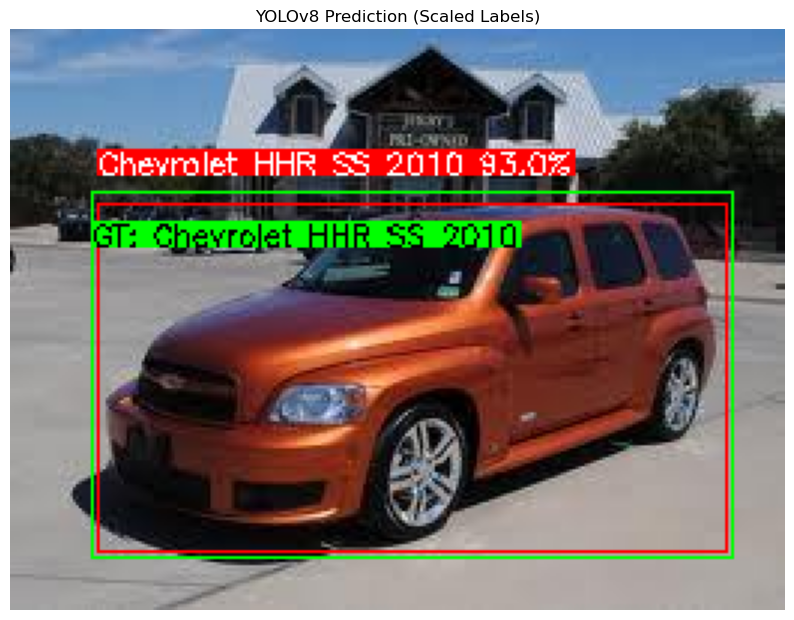

In [273]:
import matplotlib.pyplot as plt
import cv2
from ultralytics import YOLO
import os
os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"

# Load your trained model
model = YOLO("runs/detect/train16/weights/best.pt")

img_path = (r"datasets\data\images\test\0019.jpg")
img_path = (r"datasets\data\images\val\00010.jpg")
result = model.predict(source=img_path, save=True)[0]

def visualize_predictions(img_path, result, model_names):
    # Load image
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    H, W = img.shape[:2]

    # Auto-scale font size and box thickness based on image width
    font_scale = max(0.3, min(2.0, W / 800))     # adjust range as needed
    thickness = max(1, int(W / 500))             # 1–3 usually good

    # Draw predictions (in red)
    for box in result.boxes:
        x1, y1, x2, y2 = map(int, box.xyxy[0].tolist())
        cls = int(box.cls[0])
        conf = float(box.conf[0])
        label = f"{model_names[cls]} {100*conf:.1f}%"

        # Draw predicted box
        cv2.rectangle(img, (x1, y1), (x2, y2), (255, 0, 0), thickness)

        # Label placement
        (text_width, text_height), _ = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, font_scale, thickness)
        label_y = y1 - 10 if y1 - 10 > text_height else y1 + text_height + 10
        cv2.rectangle(img, (x1, label_y - text_height), (x1 + text_width, label_y), (255, 0, 0), -1)
        cv2.putText(img, label, (x1, label_y), cv2.FONT_HERSHEY_SIMPLEX, font_scale, (255, 255, 255), thickness)

    # 🔍 Try to find corresponding ground truth label file
    label_file = img_path.replace("images", "labels").replace(".jpg", ".txt")

    if os.path.exists(label_file):
        with open(label_file, "r") as f:
            for line in f:
                cls_id, x_center, y_center, w, h = map(float, line.strip().split())
                x1 = int((x_center - w / 2) * W)
                y1 = int((y_center - h / 2) * H)
                x2 = int((x_center + w / 2) * W)
                y2 = int((y_center + h / 2) * H)

                # Draw ground truth box (in green)
                label = f"GT: {model_names[int(cls_id)]}"
                cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), thickness)

                (text_width, text_height), _ = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, font_scale, thickness)
                label_y = y1 + text_height + 10  # Always put GT below the box
                cv2.rectangle(img, (x1, label_y - text_height), (x1 + text_width, label_y), (0, 255, 0), -1)
                cv2.putText(img, label, (x1, label_y), cv2.FONT_HERSHEY_SIMPLEX, font_scale, (0, 0, 0), thickness)



    # Show image
    plt.figure(figsize=(10, 10))
    plt.imshow(img)
    plt.axis("off")
    plt.title("YOLOv8 Prediction (Scaled Labels)")
    plt.show()

result = model.predict(source=img_path, conf=0.25, save=False)[0]
visualize_predictions(img_path, result, model.names)



image 1/1 C:\Users\Ethan\OneDrive\Desktop\ECE 4990 Final Project\datasets\data\images\val\00063.jpg: 288x640 1 Nissan 240SX Coupe 1998, 57.5ms
Speed: 2.8ms preprocess, 57.5ms inference, 2.1ms postprocess per image at shape (1, 3, 288, 640)

Class: Nissan 240SX Coupe 1998
Confidence Level: 96.5%



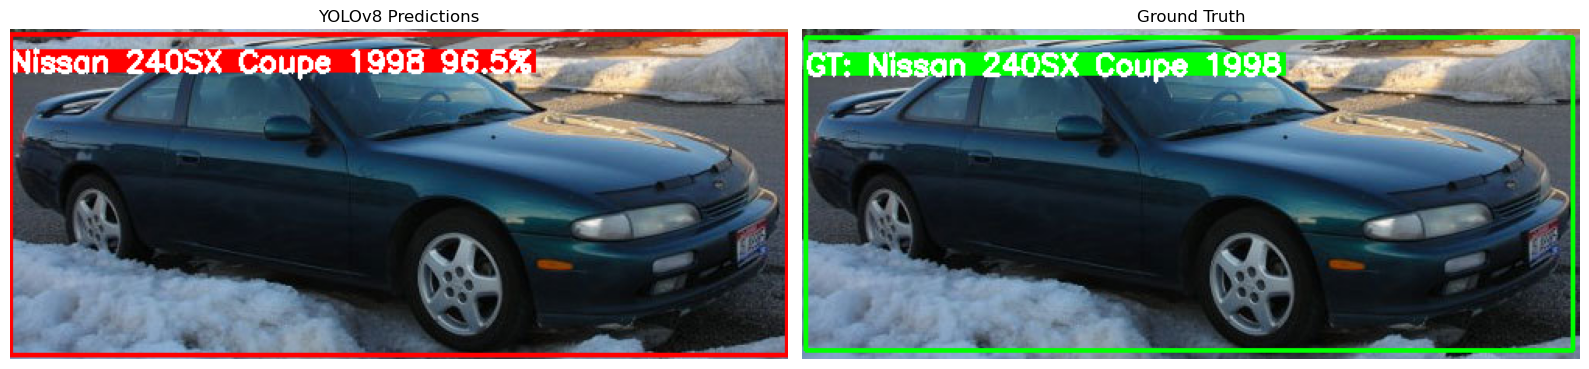

In [361]:
# Model predicts against grabbed images from the internet
# Displays the predicted boxes and the GT box if available

import matplotlib.pyplot as plt
import cv2
import os
from ultralytics import YOLO

os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"

# Load trained model
model = YOLO("runs/detect/train16/weights/best.pt")

# Choose image
img_path = r"datasets\data\images\val\00063.jpg"
result = model.predict(source=img_path, conf=0.25, save=False)[0]

def draw_boxes(img, boxes, model_names, color, label_prefix="", font_scale=1.0, thickness=2):
    for box in boxes:
        if isinstance(box, list):  # GT box [x1, y1, x2, y2, class_id]
            x1, y1, x2, y2, cls_id = box
            label = f"{label_prefix}{model_names[int(cls_id)]}"
        else:  # Predicted box (from result.boxes)
            x1, y1, x2, y2 = map(int, box.xyxy[0].tolist())
            cls_id = int(box.cls[0])
            conf = float(box.conf[0])
            label = f"{label_prefix}{model_names[cls_id]} {100*conf:.1f}%"
            print(f"\nClass: {label_prefix}{model_names[cls_id]}")
            print(f"Confidence Level: {100*conf:.1f}%\n")

        # Draw box
        cv2.rectangle(img, (x1, y1), (x2, y2), color, thickness)

        # Label text
        (text_width, text_height), _ = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, font_scale, thickness)
        label_y = y1 - 10 if y1 - 10 > text_height else y1 + text_height + 10
        cv2.rectangle(img, (x1, label_y - text_height), (x1 + text_width, label_y), color, -1)
        cv2.putText(img, label, (x1, label_y), cv2.FONT_HERSHEY_SIMPLEX, font_scale, (255, 255, 255), thickness)

def visualize_side_by_side(img_path, result, model_names):
    # Load original image
    img_orig = cv2.imread(img_path)
    img_rgb = cv2.cvtColor(img_orig.copy(), cv2.COLOR_BGR2RGB)
    H, W = img_rgb.shape[:2]

    font_scale = max(0.5, min(2.0, W / 800))
    thickness = max(2, int(W / 500))

    # ---------- Image 1: Predictions ----------
    pred_img = img_rgb.copy()
    draw_boxes(pred_img, result.boxes, model_names, color=(255, 0, 0), label_prefix="", font_scale=font_scale, thickness=thickness)

    # ---------- Image 2: Ground Truth ----------
    gt_img = img_rgb.copy()
    label_file = img_path.replace("images", "labels").replace(".jpg", ".txt")
    if os.path.exists(label_file):
        with open(label_file, "r") as f:
            gt_boxes = []
            for line in f:
                cls_id, x_center, y_center, w, h = map(float, line.strip().split())
                x1 = int((x_center - w / 2) * W)
                y1 = int((y_center - h / 2) * H)
                x2 = int((x_center + w / 2) * W)
                y2 = int((y_center + h / 2) * H)
                gt_boxes.append([x1, y1, x2, y2, cls_id])
        draw_boxes(gt_img, gt_boxes, model_names, color=(0, 255, 0), label_prefix="GT: ", font_scale=font_scale, thickness=thickness)
    else:
        print("No ground truth label file found.")

    # ---------- Combine and Show ----------
    fig, axs = plt.subplots(1, 2, figsize=(16, 8))
    axs[0].imshow(pred_img)
    axs[0].set_title("YOLOv8 Predictions")
    axs[0].axis("off")

    axs[1].imshow(gt_img)
    axs[1].set_title("Ground Truth")
    axs[1].axis("off")

    plt.tight_layout()
    plt.show()

# Run the visualization
visualize_side_by_side(img_path, result, model.names)




In [203]:
# Model predicts on a given video

from ultralytics import YOLO
import os

# Testing on videos of cars

os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"

# Load trained model
model = YOLO("runs/detect/train16/weights/best.pt")

# Run on a video
results = model.predict(source=(r"datasets\data\videos\0002.mp4"), save=True, conf=0.25)

# Output saved to runs/predict/



WARNING 
inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/671) C:\Users\Ethan\OneDrive\Desktop\ECE 4990 Final Project\datasets\data\videos\0002.mp4: 384x640 1 Tesla Model S Sedan 2012, 8.3ms
video 1/1 (frame 2/671) C:\Users\Ethan\OneDrive\Desktop\ECE 4990 Final Project\datasets\data\videos\0002.mp4: 384x640 1 Tesla Model S Sedan 2012, 11.6ms
video 1/1 (frame 3/671) C:\Users\Ethan\OneDrive\Desktop\ECE 4990 Final Project\datasets\data\videos\0002.mp4: 384x640 1 Tesla Model S Sedan 2012, 11.8ms
v

In [5]:
import pandas as pd

df = pd.read_csv("runs/detect/train16/results.csv")
df[[
    "epoch", 
    "metrics/precision(B)", 
    "metrics/recall(B)", 
    "metrics/mAP50(B)", 
    "metrics/mAP50-95(B)"
]].tail()


,epoch,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B)
195,196,0.92684,0.93051,0.95534,0.90767
196,197,0.92536,0.93140,0.95541,0.90773
197,198,0.92560,0.93160,0.95541,0.90769
198,199,0.92549,0.93183,0.95544,0.90784
199,200,0.92594,0.93118,0.95539,0.90768


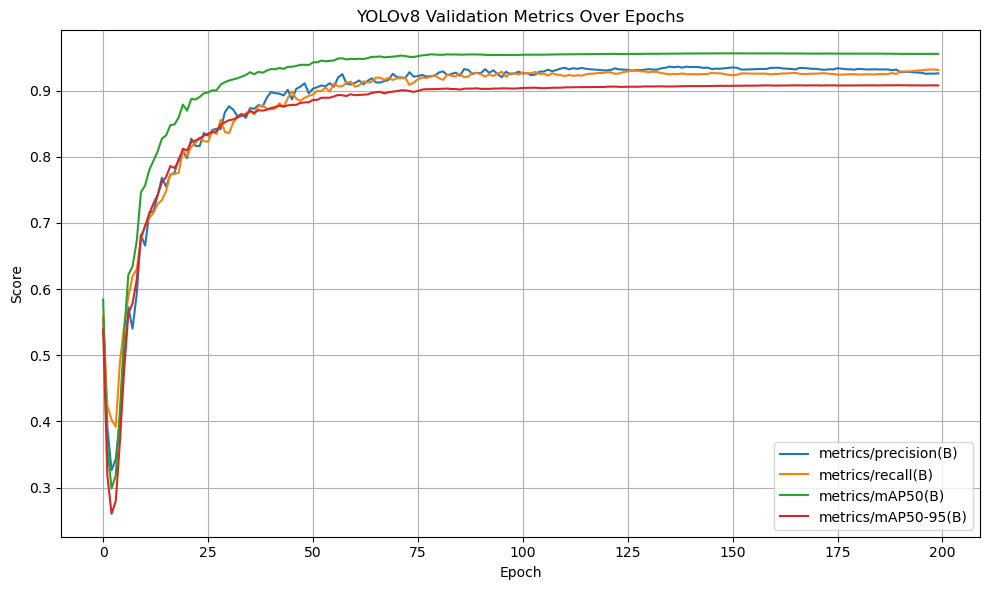

In [7]:
import matplotlib.pyplot as plt

df[[
    "metrics/precision(B)", 
    "metrics/recall(B)", 
    "metrics/mAP50(B)", 
    "metrics/mAP50-95(B)"
]].plot(figsize=(10, 6))

plt.title("YOLOv8 Validation Metrics Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Score")
plt.grid(True)
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()


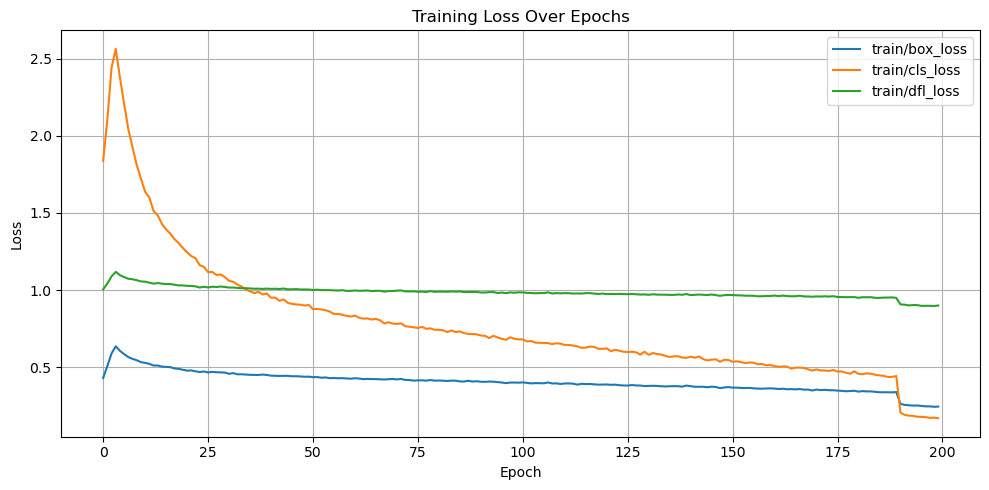

In [9]:
df[["train/box_loss", "train/cls_loss", "train/dfl_loss"]].plot(figsize=(10, 5))
plt.title("Training Loss Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.tight_layout()
plt.show()


In [253]:
# Code to look through the ImageNet Video Dataset and find all unique Sysnet IDs

import os
import xml.etree.ElementTree as ET
from tqdm import tqdm

# Path to the ImageNet Video Dataset Annotations val folder
xml_root_dir = r"F:\ECE 4990\ImageNet\data\ImageNet2015\object_detection_from_video\ILSVRC2015\Annotations\VID\val"

# Set to hold unique synset IDs
unique_ids = set()

# List all video directories (each contains XMLs for one video)
video_dirs = [os.path.join(xml_root_dir, d) for d in os.listdir(xml_root_dir)
              if os.path.isdir(os.path.join(xml_root_dir, d))]

# Progress bar
for video_dir in tqdm(video_dirs, desc="Scanning videos"):
    try:
        # Get list of XML files in the directory
        xml_files = [f for f in os.listdir(video_dir) if f.endswith('.xml')]
        if not xml_files:
            continue  # skip if no XML files

        first_xml_path = os.path.join(video_dir, xml_files[0])
        tree = ET.parse(first_xml_path)
        root = tree.getroot()

        for obj in root.findall("object"):
            name = obj.find("name").text.strip()
            unique_ids.add(name)

    except Exception as e:
        print(f"Error {video_dir}: {e}")
        continue

# Output results
print("Found Synset IDs:")
for synset in sorted(unique_ids):
    print(synset)


Scanning videos: 100%|██████████| 555/555 [00:00<00:00, 2014.33it/s]


Found Synset IDs:
n01503061
n01662784
n01674464
n01726692
n02062744
n02084071
n02118333
n02121808
n02129165
n02129604
n02131653
n02324045
n02342885
n02355227
n02374451
n02391049
n02402425
n02411705
n02419796
n02484322
n02503517
n02509815
n02510455
n02691156
n02834778
n02924116
n02958343
n03790512
n04468005
n04530566


In [63]:
# Converts the Annotations from the ImageNet Video Dataset into a YOLO format

import os
import xml.etree.ElementTree as ET
from shutil import copy2
from tqdm import tqdm

# Paths to Annotations and Images from ImageNet Dataset
xml_root_dir = r"F:\ECE 4990\ImageNet\data\ImageNet2015\object_detection_from_video\ILSVRC2015\Annotations\VID\val"
img_root_dir = r"F:\ECE 4990\ImageNet\data\ImageNet2015\object_detection_from_video\ILSVRC2015\Data\VID\val"

# Output
output_base = r"datasets\data\imagenet_eval"
label_root = os.path.join(output_base, "labels/val")
image_root = os.path.join(output_base, "images/val")

# Class mapping
class_name_to_id = {'n02958343': 0}  # Sysnet ID for car

def convert_bbox_to_yolo(size, box):
    dw = 1.0 / size[0]
    dh = 1.0 / size[1]
    x_center = (box[0] + box[1]) / 2.0
    y_center = (box[2] + box[3]) / 2.0
    w = box[1] - box[0]
    h = box[3] - box[2]
    return (x_center * dw, y_center * dh, w * dw, h * dh)

# Search for all XML files recursively
all_xml_paths = []
for root, _, files in os.walk(xml_root_dir):
    for file in files:
        if file.endswith(".xml"):
            all_xml_paths.append(os.path.join(root, file))

# Convert the XMLs to YOLO format w/ progress bar
for xml_path in tqdm(all_xml_paths, desc="Converting XMLs to YOLO format"):
    try:
        tree = ET.parse(xml_path)
        root = tree.getroot()

        image_filename = root.find("filename").text.strip()
        width = int(root.find("size/width").text)
        height = int(root.find("size/height").text)

        yolo_annotations = []

        for obj in root.findall("object"):
            name = obj.find("name").text.strip()
            if name != 'n02958343':
                continue  

            bbox = obj.find("bndbox")
            xmin = float(bbox.find("xmin").text)
            xmax = float(bbox.find("xmax").text)
            ymin = float(bbox.find("ymin").text)
            ymax = float(bbox.find("ymax").text)

            yolo_box = convert_bbox_to_yolo((width, height), (xmin, xmax, ymin, ymax))
            yolo_line = f"{class_name_to_id[name]} {' '.join(map(str, yolo_box))}"
            yolo_annotations.append(yolo_line)

        if yolo_annotations:
            # Determine subfolder name
            subfolder = os.path.basename(os.path.dirname(xml_path))
            base_filename = os.path.splitext(os.path.basename(xml_path))[0]

            # Build output paths
            label_folder = os.path.join(label_root, subfolder)
            image_folder = os.path.join(image_root, subfolder)
            os.makedirs(label_folder, exist_ok=True)
            os.makedirs(image_folder, exist_ok=True)

            # Save label file
            label_path = os.path.join(label_folder, base_filename + '.txt')
            with open(label_path, 'w') as f:
                f.write('\n'.join(yolo_annotations))

            # Copy corresponding image
            image_src_path = os.path.join(img_root_dir, subfolder, base_filename + '.JPEG')
            image_dst_path = os.path.join(image_folder, base_filename + '.JPEG')
            if os.path.exists(image_src_path):
                copy2(image_src_path, image_dst_path)
            else:
                print(f"Image not found for: {image_src_path}")

    except Exception as e:
        print(f"Error processing {xml_path}: {e}")


Converting XMLs to YOLO format: 100%|██████████| 176126/176126 [00:37<00:00, 4656.21it/s]


In [65]:
import yaml

# .yaml file for ImageNet Video Dataset
imagenet_yaml = {
    'path': 'datasets/data/imagenet_eval',
    'train': '../NA',  # Not used since we are using this dataset only for validation
    'val': 'images/val',    
    'nc': 1,
    'names': ['car']
}

# Save to file
with open('data_imagenet_eval.yaml', 'w') as f:
    yaml.dump(imagenet_yaml, f)

print("data_imagenet_eval.yaml created.")


✅ data_imagenet_eval.yaml created.


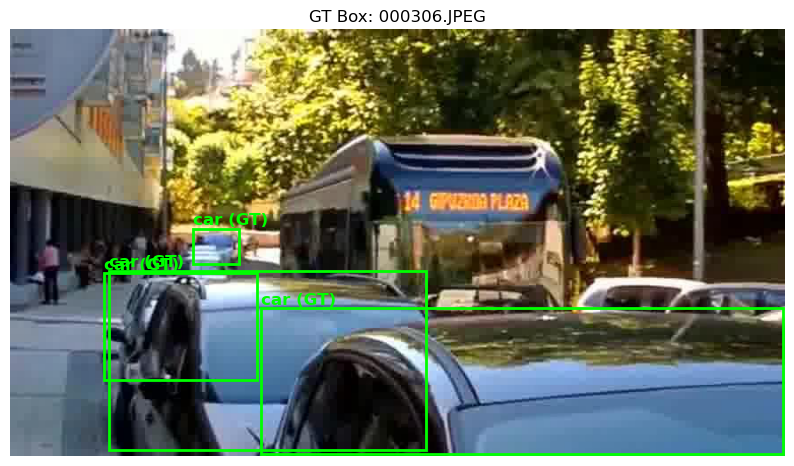

In [263]:
# Displays car images from the ImageNet Video Dataset with the Ground Truth Boxes for verification

import os
import random
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

# Paths to images and annotations
image_root = r"datasets\data\imagenet_eval\images\val"
label_root = r"datasets\data\imagenet_eval\labels\val"

# Get all image-label pairs
image_label_pairs = []
for root, _, files in os.walk(image_root):
    for file in files:
        if file.endswith('.JPEG'):
            image_path = os.path.join(root, file)
            rel_subdir = os.path.relpath(root, image_root)
            label_path = os.path.join(label_root, rel_subdir, os.path.splitext(file)[0] + '.txt')
            if os.path.exists(label_path):
                image_label_pairs.append((image_path, label_path))

# Pick a random sample
img_path, label_path = random.choice(image_label_pairs)

# Load image
image = Image.open(img_path).convert("RGB")
img_width, img_height = image.size

# Plot
fig, ax = plt.subplots(1, figsize=(10, 8))
ax.imshow(image)

# Load and draw GT boxes
with open(label_path, "r") as f:
    for line in f:
        class_id, x_center, y_center, width, height = map(float, line.strip().split())
        # Convert YOLO format to pixel format
        x = (x_center - width / 2) * img_width
        y = (y_center - height / 2) * img_height
        w = width * img_width
        h = height * img_height
        rect = patches.Rectangle((x, y), w, h, linewidth=2, edgecolor='lime', facecolor='none')
        ax.add_patch(rect)
        ax.text(x, y - 5, 'car (GT)', color='lime', fontsize=12, weight='bold')

ax.set_title(f"GT Box: {os.path.basename(img_path)}")
plt.axis("off")
plt.show()


In [154]:
# Evaluation Summary on the ImageNet Video Dataset

import os
import glob
import numpy as np
from tqdm import tqdm

# Paths
gt_label_root = r"datasets\data\imagenet_eval\labels\val"
pred_label_root = r"runs\detect\val11\labels" 

# Threshold
IOU_THRESHOLD = 0.5

def load_yolo_boxes(path):
    boxes = []
    if not os.path.exists(path):
        return boxes
    with open(path, 'r') as f:
        for line in f:
            parts = line.strip().split()
            if len(parts) < 5:
                continue
            cls_id, x, y, w, h = map(float, parts[0:5])  # normalized
            boxes.append([x, y, w, h])
    return boxes

def iou(box1, box2):
    # Convert [x, y, w, h] to [x1, y1, x2, y2]
    def to_corners(b):
        x1 = b[0] - b[2]/2
        y1 = b[1] - b[3]/2
        x2 = b[0] + b[2]/2
        y2 = b[1] + b[3]/2
        return x1, y1, x2, y2
    
    b1 = to_corners(box1)
    b2 = to_corners(box2)

    xi1 = max(b1[0], b2[0])
    yi1 = max(b1[1], b2[1])
    xi2 = min(b1[2], b2[2])
    yi2 = min(b1[3], b2[3])

    inter_area = max(xi2 - xi1, 0) * max(yi2 - yi1, 0)
    box1_area = (b1[2] - b1[0]) * (b1[3] - b1[1])
    box2_area = (b2[2] - b2[0]) * (b2[3] - b2[1])
    union_area = box1_area + box2_area - inter_area

    return inter_area / union_area if union_area > 0 else 0

# Run matching
total_tp, total_fp, total_fn = 0, 0, 0
matched_files = 0

# Flatten all GT files
gt_files = glob.glob(os.path.join(gt_label_root, '**', '*.txt'), recursive=True)

for gt_path in tqdm(gt_files, desc="Comparing predictions to GT"):
    fname = os.path.basename(gt_path)
    pred_path = os.path.join(pred_label_root, fname)

    gt_boxes = load_yolo_boxes(gt_path)
    pred_boxes = load_yolo_boxes(pred_path)

    matched_gt = set()
    tp = 0

    for pred_box in pred_boxes:
        match_found = False
        for i, gt_box in enumerate(gt_boxes):
            if i in matched_gt:
                continue
            if iou(pred_box, gt_box) >= IOU_THRESHOLD:
                tp += 1
                matched_gt.add(i)
                match_found = True
                break
        if not match_found:
            total_fp += 1  # predicted box didn't match anything

    total_tp += tp
    total_fn += len(gt_boxes) - len(matched_gt)
    matched_files += 1

# Final metrics
precision = total_tp / (total_tp + total_fp) if (total_tp + total_fp) > 0 else 0
recall = total_tp / (total_tp + total_fn) if (total_tp + total_fn) > 0 else 0

print("\n✅ Evaluation Summary")
print(f"Matched files: {matched_files}")
print(f"True Positives:   {total_tp}")
print(f"False Positives:  {total_fp}")
print(f"False Negatives:  {total_fn}")
print(f"Precision:        {precision:.4f}")
print(f"Recall:           {recall:.4f}")


Comparing predictions to GT: 100%|██████████| 11066/11066 [00:02<00:00, 3897.14it/s]


✅ Evaluation Summary
Matched files: 11066
True Positives:   1348
False Positives:  21630
False Negatives:  25342
Precision:        0.0587
Recall:           0.0505


In [195]:
# Validation Results on the ImageNet Video Dataset

from ultralytics import YOLO
import os

os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"

# Load trained model
model = YOLO("runs/detect/train16/weights/best.pt")

# Run validation on your ImageNet val set
metrics = model.val(
    data=r"data_imagenet_eval.yaml",  # YAML file
    imgsz=640, # Scales images to this size
    conf=0.25, # Confidence threshold of 25%
    iou=0.5, # Intersection over Union threshold of 50%
    save=True,  # Saves for visualization later
    save_txt=True # Saves the labels for predicted boxes
)

# Print evaluation results
print("Validation Results:")
print(metrics)
print(f"Precision (mp):     {metrics.box.mp:.4f}")
print(f"Recall (mr):        {metrics.box.mr:.4f}")
print(f"mAP@0.5:            {metrics.box.map50:.4f}")
print(f"mAP@0.5:0.95:       {metrics.box.map:.4f}")


Ultralytics 8.3.121  Python-3.12.7 torch-2.7.0+cu128 CUDA:0 (NVIDIA GeForce RTX 3070 Ti, 8192MiB)
Model summary (fused): 72 layers, 3,369,812 parameters, 0 gradients, 9.8 GFLOPs
val: Fast image access  (ping: 0.10.0 ms, read: 748.6349.8 MB/s, size: 82.9 KB)


val: Scanning C:\Users\Ethan\OneDrive\Desktop\ECE 4990 Final Project\datasets\data\labels\val.cache... 8041 images, 0 backgrounds, 0 corrupt: 100%|██████████| 8041/8041 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 503/503 [01:01<00:00,  8.20it/s]


                   all       8041       8041      0.929      0.929      0.949       0.91
AM General Hummer SUV 2000         44         44      0.977      0.974      0.989      0.893
   Acura RL Sedan 2012         32         32       0.77      0.836      0.914      0.907
   Acura TL Sedan 2012         43         43      0.865      0.907        0.9      0.814
  Acura TL Type-S 2008         42         42      0.985          1      0.995       0.99
  Acura TSX Sedan 2012         40         40          1      0.798        0.9      0.887
Acura Integra Type R 2001         44         44      0.959      0.932      0.966      0.948
Acura ZDX Hatchback 2012         39         39      0.954      0.872      0.942      0.924
Aston Martin V8 Vantage Convertible 2012         45         45      0.804      0.819      0.876       0.81
Aston Martin V8 Vantage Coupe 2012         41         41      0.809      0.805      0.886      0.817
Aston Martin Virage Convertible 2012         33         33      0.831  

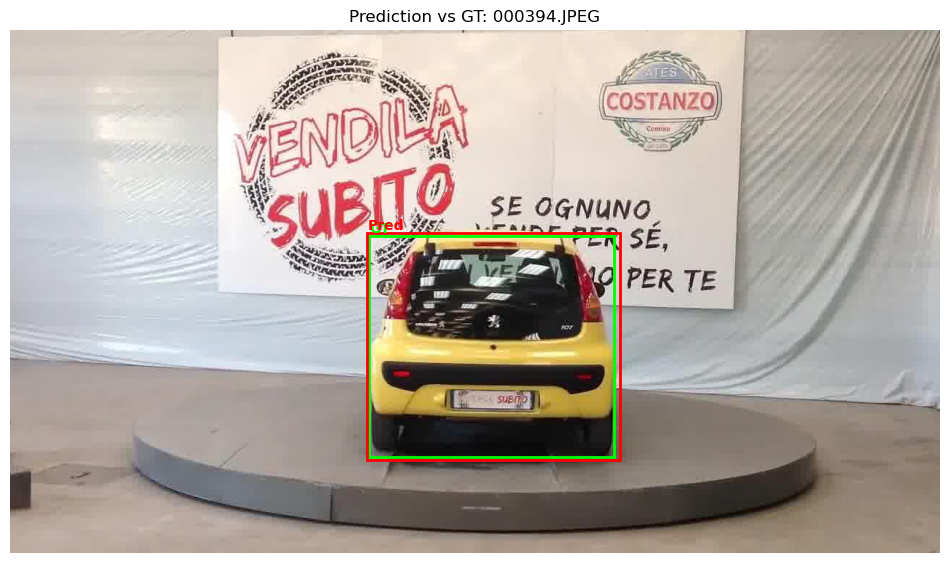

In [267]:
# Displays predicted boxes from validation and the GT boxes

import os
import random
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

# Paths
image_root = r"datasets\data\imagenet_eval\images\val"
gt_label_root = r"datasets\data\imagenet_eval\labels\val"
pred_label_root = r"runs\detect\val11\labels"  

# Collect valid image-label-prediction triplets
pairs = []
for root, _, files in os.walk(gt_label_root):
    for file in files:
        if not file.endswith('.txt'):
            continue
        rel_path = os.path.relpath(root, gt_label_root)
        image_path = os.path.join(image_root, rel_path, file.replace('.txt', '.JPEG'))
        gt_path = os.path.join(gt_label_root, rel_path, file)
        pred_path = os.path.join(pred_label_root, file)

        if os.path.exists(image_path) and os.path.exists(pred_path):
            pairs.append((image_path, gt_path, pred_path))

if not pairs:
    raise FileNotFoundError("No matching GT and prediction files found.")

# Pick one at random
image_path, gt_path, pred_path = random.choice(pairs)

# Load image
image = Image.open(image_path).convert("RGB")
img_w, img_h = image.size

# Helper to draw boxes
def draw_boxes(ax, box_list, color, label):
    for box in box_list:
        x, y, w, h = map(float, box)
        x = (x - w / 2) * img_w
        y = (y - h / 2) * img_h
        w *= img_w
        h *= img_h
        rect = patches.Rectangle((x, y), w, h, linewidth=2, edgecolor=color, facecolor='none')
        ax.add_patch(rect)
        ax.text(x, y - 5, label, color=color, fontsize=10, weight='bold')

# Load boxes
with open(gt_path, 'r') as f:
    gt_boxes = [line.strip().split()[1:] for line in f if line.strip()]

with open(pred_path, 'r') as f:
    pred_boxes = [line.strip().split()[1:] for line in f if line.strip()]

# Plot
fig, ax = plt.subplots(1, figsize=(12, 8))
ax.imshow(image)
draw_boxes(ax, gt_boxes, color='lime', label='GT')
draw_boxes(ax, pred_boxes, color='red', label='Pred')

plt.title(f"Prediction vs GT: {os.path.basename(image_path)}")
plt.axis("off")
plt.show()


In [167]:
# Stitch together the frames for each video with the predicted boxes from validation and the GT boxes

import os
import cv2
import shutil
from tqdm import tqdm

# --- Settings ---
CONF_THRESHOLD = 0.75     # Confidence threshold
MAX_PREDICTIONS = 2      # Max number of boxes per frame
FPS = 10
OUTPUT_VIDEO = "model_vs_gt_video.mp4"
TEMP_FRAME_DIR = "temp_frames"

# --- Paths ---
image_root = r"datasets\data\imagenet_eval\images\val"
gt_label_root = r"datasets\data\imagenet_eval\labels\val"
pred_label_root = r"runs\detect\val11\labels"  # update as needed

# --- Load boxes ---
def load_yolo_boxes(path, include_conf=False):
    boxes = []
    if not os.path.exists(path):
        return boxes
    with open(path, "r") as f:
        for line in f:
            parts = line.strip().split()
            if len(parts) >= 5:
                box = list(map(float, parts[1:5]))
                if include_conf and len(parts) >= 6:
                    box.append(float(parts[5]))  # confidence
                boxes.append(box)
    return boxes

# --- Draw boxes ---
def draw_yolo_boxes(image, boxes, color, label_text, show_conf=False):
    h, w = image.shape[:2]
    for box in boxes:
        if show_conf and len(box) == 5:
            x, y, bw, bh, conf = box
            if conf < CONF_THRESHOLD:
                continue
        else:
            x, y, bw, bh = box[:4]
            conf = None

        x1 = int((x - bw / 2) * w)
        y1 = int((y - bh / 2) * h)
        x2 = int((x + bw / 2) * w)
        y2 = int((y + bh / 2) * h)

        label = f"{label_text}"
        if show_conf and conf is not None:
            label += f" ({conf:.2f})"

        cv2.rectangle(image, (x1, y1), (x2, y2), color, 2)
        cv2.putText(image, label, (x1, max(15, y1 - 5)),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

# --- Setup temp frame directory ---
if os.path.exists(TEMP_FRAME_DIR):
    shutil.rmtree(TEMP_FRAME_DIR)
os.makedirs(TEMP_FRAME_DIR)

# --- Build image-label-pred triplets ---
triplets = []
for root, _, files in os.walk(gt_label_root):
    for file in files:
        if file.endswith(".txt"):
            rel = os.path.relpath(root, gt_label_root)
            base = os.path.splitext(file)[0]
            img_path = os.path.join(image_root, rel, base + ".JPEG")
            gt_path = os.path.join(gt_label_root, rel, file)
            pred_path = os.path.join(pred_label_root, file)
            if os.path.exists(img_path) and os.path.exists(pred_path):
                triplets.append((img_path, gt_path, pred_path))

# --- Create video frames ---
frame_size = None
for i, (img_path, gt_path, pred_path) in enumerate(tqdm(triplets, desc="Creating video frames")):
    image = cv2.imread(img_path)
    if image is None:
        continue
    if frame_size is None:
        frame_size = (image.shape[1], image.shape[0])

    gt_boxes = load_yolo_boxes(gt_path, include_conf=False)
    pred_boxes = load_yolo_boxes(pred_path, include_conf=True)

    # Filter predictions by confidence and limit count
    pred_boxes = [b for b in pred_boxes if b[-1] >= CONF_THRESHOLD]
    pred_boxes = sorted(pred_boxes, key=lambda x: x[-1], reverse=True)[:MAX_PREDICTIONS]

    draw_yolo_boxes(image, gt_boxes, color=(0, 255, 0), label_text="GT", show_conf=False)
    draw_yolo_boxes(image, pred_boxes, color=(0, 0, 255), label_text="Pred", show_conf=True)

    out_frame = os.path.join(TEMP_FRAME_DIR, f"frame_{i:05d}.jpg")
    cv2.imwrite(out_frame, image)

# --- Write video ---
frame_files = sorted(os.listdir(TEMP_FRAME_DIR))
video = cv2.VideoWriter(OUTPUT_VIDEO, cv2.VideoWriter_fourcc(*'mp4v'), FPS, frame_size)

for frame_file in frame_files:
    frame = cv2.imread(os.path.join(TEMP_FRAME_DIR, frame_file))
    video.write(frame)

video.release()
print(f"Video with predictions saved to: {OUTPUT_VIDEO}")


Creating video frames: 100%|██████████| 6311/6311 [00:26<00:00, 237.00it/s]



🎞️ Clean video with predictions saved to: model_vs_gt_video.mp4


In [197]:
# Run model predictions on a given set of video frames
# Stitch frames together to create a video with predicted boxes and GT boxes

import os
import cv2
from ultralytics import YOLO
from tqdm import tqdm

# === Configuration ===
model_path = "runs/detect/train16/weights/best.pt"
frame_dir = r"datasets\data\imagenet_eval\images\val\ILSVRC2015_val_00011004"
label_root = r"datasets\data\imagenet_eval\labels\val\ILSVRC2015_val_00011004"
output_video_path = "video_with_preds_gt.mp4"
conf_threshold = 0.25
fps = 10

# === Load model ===
os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"
model = YOLO(model_path)

# === Utility functions ===
def load_gt_boxes(label_path, img_w, img_h):
    boxes = []
    if not os.path.exists(label_path):
        return boxes
    with open(label_path, 'r') as f:
        for line in f:
            cls_id, x, y, w, h = map(float, line.strip().split())
            x1 = int((x - w / 2) * img_w)
            y1 = int((y - h / 2) * img_h)
            x2 = int((x + w / 2) * img_w)
            y2 = int((y + h / 2) * img_h)
            boxes.append([x1, y1, x2, y2, int(cls_id)])
    return boxes

def draw_boxes(img, boxes, names, color, is_pred=False):
    for box in boxes:
        if is_pred:
            x1, y1, x2, y2 = map(int, box[:4])
            cls_id = int(box[5])
            conf = box[4]
            label = f"{names[cls_id]} ({conf:.2f})"
        else:
            x1, y1, x2, y2, cls_id = box
            label = f"GT: {names[cls_id]}"
        cv2.rectangle(img, (x1, y1), (x2, y2), color, 2)
        cv2.putText(img, label, (x1, max(15, y1 - 5)),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

# === Prepare video writer ===
frame_files = sorted([f for f in os.listdir(frame_dir) if f.endswith('.JPEG')])
first_frame = cv2.imread(os.path.join(frame_dir, frame_files[0]))
height, width = first_frame.shape[:2]
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
video = cv2.VideoWriter(output_video_path, fourcc, fps, (width, height))

# === Process each frame ===
for fname in tqdm(frame_files, desc="Generating video"):
    frame_path = os.path.join(frame_dir, fname)
    label_path = os.path.join(label_root, fname.replace('.JPEG', '.txt'))

    # Read and predict
    img = cv2.imread(frame_path)
    results = model.predict(source=img, conf=conf_threshold, save=False)[0]
    
    # Draw predictions (red)
    pred_boxes = []
    for box in results.boxes:
        x1, y1, x2, y2 = box.xyxy[0].tolist()
        conf = float(box.conf[0])
        cls_id = int(box.cls[0])
        pred_boxes.append([x1, y1, x2, y2, conf, cls_id])
    draw_boxes(img, pred_boxes, model.names, color=(0, 0, 255), is_pred=True)

    # Draw ground truth (green)
    gt_boxes = load_gt_boxes(label_path, width, height)
    draw_boxes(img, gt_boxes, model.names, color=(0, 255, 0), is_pred=False)

    # Add to video
    video.write(img)

# === Finalize video ===
video.release()
print(f"Video saved to: {output_video_path}")


Generating video:   0%|          | 0/93 [00:00<?, ?it/s]


0: 384x640 1 Nissan 240SX Coupe 1998, 18.1ms
Speed: 2.9ms preprocess, 18.1ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Generating video:   1%|          | 1/93 [00:00<00:27,  3.35it/s]


0: 384x640 1 Nissan 240SX Coupe 1998, 59.5ms
Speed: 3.1ms preprocess, 59.5ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Nissan 240SX Coupe 1998, 7.5ms
Speed: 1.3ms preprocess, 7.5ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Generating video:   3%|▎         | 3/93 [00:00<00:10,  8.67it/s]


0: 384x640 1 Nissan 240SX Coupe 1998, 7.6ms
Speed: 1.2ms preprocess, 7.6ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Nissan 240SX Coupe 1998, 6.0ms
Speed: 1.1ms preprocess, 6.0ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Nissan 240SX Coupe 1998, 6.6ms
Speed: 1.4ms preprocess, 6.6ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Nissan 240SX Coupe 1998, 8.9ms
Speed: 1.1ms preprocess, 8.9ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Nissan 240SX Coupe 1998, 7.5ms
Speed: 1.3ms preprocess, 7.5ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Generating video:   9%|▊         | 8/93 [00:00<00:04, 20.65it/s]


0: 384x640 1 Aston Martin V8 Vantage Convertible 2012, 8.3ms
Speed: 1.2ms preprocess, 8.3ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Aston Martin V8 Vantage Convertible 2012, 1 Nissan 240SX Coupe 1998, 8.0ms
Speed: 1.2ms preprocess, 8.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Nissan 240SX Coupe 1998, 7.0ms
Speed: 1.5ms preprocess, 7.0ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Nissan 240SX Coupe 1998, 7.6ms
Speed: 1.4ms preprocess, 7.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Nissan 240SX Coupe 1998, 7.1ms
Speed: 1.1ms preprocess, 7.1ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Generating video:  14%|█▍        | 13/93 [00:00<00:02, 28.45it/s]


0: 384x640 1 Nissan 240SX Coupe 1998, 7.9ms
Speed: 1.1ms preprocess, 7.9ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Nissan 240SX Coupe 1998, 7.9ms
Speed: 1.0ms preprocess, 7.9ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Nissan 240SX Coupe 1998, 6.7ms
Speed: 1.1ms preprocess, 6.7ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Nissan 240SX Coupe 1998, 6.5ms
Speed: 1.3ms preprocess, 6.5ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Nissan 240SX Coupe 1998, 5.6ms
Speed: 1.0ms preprocess, 5.6ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


Generating video:  19%|█▉        | 18/93 [00:00<00:02, 33.96it/s]


0: 384x640 1 Nissan 240SX Coupe 1998, 6.5ms
Speed: 1.2ms preprocess, 6.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Nissan 240SX Coupe 1998, 6.0ms
Speed: 1.2ms preprocess, 6.0ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Nissan 240SX Coupe 1998, 6.2ms
Speed: 1.3ms preprocess, 6.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Nissan 240SX Coupe 1998, 5.6ms
Speed: 1.1ms preprocess, 5.6ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Nissan 240SX Coupe 1998, 5.7ms
Speed: 1.3ms preprocess, 5.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Generating video:  25%|██▍       | 23/93 [00:00<00:01, 38.10it/s]


0: 384x640 1 Nissan 240SX Coupe 1998, 10.0ms
Speed: 1.2ms preprocess, 10.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Nissan 240SX Coupe 1998, 5.6ms
Speed: 1.2ms preprocess, 5.6ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Nissan 240SX Coupe 1998, 9.1ms
Speed: 1.3ms preprocess, 9.1ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Nissan 240SX Coupe 1998, 6.8ms
Speed: 1.1ms preprocess, 6.8ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Nissan 240SX Coupe 1998, 5.6ms
Speed: 1.3ms preprocess, 5.6ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


Generating video:  30%|███       | 28/93 [00:00<00:01, 40.34it/s]


0: 384x640 1 Nissan 240SX Coupe 1998, 7.1ms
Speed: 1.1ms preprocess, 7.1ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Nissan 240SX Coupe 1998, 7.8ms
Speed: 1.2ms preprocess, 7.8ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Nissan 240SX Coupe 1998, 6.5ms
Speed: 1.0ms preprocess, 6.5ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Nissan 240SX Coupe 1998, 7.4ms
Speed: 1.2ms preprocess, 7.4ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Nissan 240SX Coupe 1998, 9.8ms
Speed: 1.1ms preprocess, 9.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Generating video:  35%|███▌      | 33/93 [00:01<00:01, 40.81it/s]


0: 384x640 1 Nissan 240SX Coupe 1998, 5.9ms
Speed: 1.1ms preprocess, 5.9ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Nissan 240SX Coupe 1998, 8.5ms
Speed: 1.2ms preprocess, 8.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Nissan 240SX Coupe 1998, 5.8ms
Speed: 1.1ms preprocess, 5.8ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Nissan 240SX Coupe 1998, 6.7ms
Speed: 1.1ms preprocess, 6.7ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Nissan 240SX Coupe 1998, 6.4ms
Speed: 1.2ms preprocess, 6.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Generating video:  41%|████      | 38/93 [00:01<00:01, 42.50it/s]


0: 384x640 1 Nissan 240SX Coupe 1998, 5.7ms
Speed: 1.3ms preprocess, 5.7ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Nissan 240SX Coupe 1998, 1 Rolls-Royce Phantom Sedan 2012, 6.0ms
Speed: 1.1ms preprocess, 6.0ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Nissan 240SX Coupe 1998, 1 Rolls-Royce Phantom Sedan 2012, 11.4ms
Speed: 1.2ms preprocess, 11.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Nissan 240SX Coupe 1998, 1 Rolls-Royce Phantom Sedan 2012, 6.7ms
Speed: 1.1ms preprocess, 6.7ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Nissan 240SX Coupe 1998, 9.8ms
Speed: 1.1ms preprocess, 9.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Generating video:  46%|████▌     | 43/93 [00:01<00:01, 42.87it/s]


0: 384x640 1 Nissan 240SX Coupe 1998, 1 Rolls-Royce Phantom Sedan 2012, 12.0ms
Speed: 1.4ms preprocess, 12.0ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Nissan 240SX Coupe 1998, 1 Rolls-Royce Phantom Sedan 2012, 7.7ms
Speed: 1.2ms preprocess, 7.7ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Nissan 240SX Coupe 1998, 10.9ms
Speed: 1.1ms preprocess, 10.9ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Nissan 240SX Coupe 1998, 6.0ms
Speed: 1.1ms preprocess, 6.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Nissan 240SX Coupe 1998, 6.4ms
Speed: 1.1ms preprocess, 6.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Generating video:  52%|█████▏    | 48/93 [00:01<00:01, 42.61it/s]


0: 384x640 1 Nissan 240SX Coupe 1998, 7.2ms
Speed: 1.1ms preprocess, 7.2ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Nissan 240SX Coupe 1998, 6.2ms
Speed: 1.3ms preprocess, 6.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Nissan 240SX Coupe 1998, 10.9ms
Speed: 1.2ms preprocess, 10.9ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Nissan 240SX Coupe 1998, 9.0ms
Speed: 1.1ms preprocess, 9.0ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 8.5ms
Speed: 1.1ms preprocess, 8.5ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


Generating video:  57%|█████▋    | 53/93 [00:01<00:00, 43.03it/s]


0: 384x640 (no detections), 6.3ms
Speed: 1.2ms preprocess, 6.3ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 5.9ms
Speed: 1.3ms preprocess, 5.9ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 5.9ms
Speed: 1.2ms preprocess, 5.9ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 6.3ms
Speed: 1.4ms preprocess, 6.3ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 9.7ms
Speed: 1.3ms preprocess, 9.7ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Generating video:  62%|██████▏   | 58/93 [00:01<00:00, 44.60it/s]


0: 384x640 1 Cadillac Escalade EXT Crew Cab 2007, 8.2ms
Speed: 1.1ms preprocess, 8.2ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Chevrolet Corvette ZR1 2012, 7.6ms
Speed: 1.2ms preprocess, 7.6ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Chevrolet Corvette ZR1 2012, 7.9ms
Speed: 1.4ms preprocess, 7.9ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Cadillac CTS-V Sedan 2012, 6.8ms
Speed: 1.1ms preprocess, 6.8ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 5.9ms
Speed: 1.1ms preprocess, 5.9ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


Generating video:  68%|██████▊   | 63/93 [00:01<00:00, 44.86it/s]


0: 384x640 (no detections), 6.6ms
Speed: 1.1ms preprocess, 6.6ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 6.8ms
Speed: 1.1ms preprocess, 6.8ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 5.7ms
Speed: 1.0ms preprocess, 5.7ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 6.5ms
Speed: 1.0ms preprocess, 6.5ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 6.4ms
Speed: 1.0ms preprocess, 6.4ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 5.6ms
Speed: 1.3ms preprocess, 5.6ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


Generating video:  74%|███████▍  | 69/93 [00:01<00:00, 47.18it/s]


0: 384x640 (no detections), 8.5ms
Speed: 1.1ms preprocess, 8.5ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 9.8ms
Speed: 1.3ms preprocess, 9.8ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 5.9ms
Speed: 1.3ms preprocess, 5.9ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Aston Martin Virage Coupe 2012, 6.0ms
Speed: 1.1ms preprocess, 6.0ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Aston Martin Virage Coupe 2012, 8.8ms
Speed: 1.2ms preprocess, 8.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Generating video:  80%|███████▉  | 74/93 [00:01<00:00, 47.15it/s]


0: 384x640 (no detections), 7.6ms
Speed: 1.3ms preprocess, 7.6ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 5.9ms
Speed: 1.2ms preprocess, 5.9ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 5.3ms
Speed: 1.0ms preprocess, 5.3ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Chevrolet Corvette ZR1 2012, 5.7ms
Speed: 1.1ms preprocess, 5.7ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Chevrolet Corvette ZR1 2012, 8.1ms
Speed: 1.0ms preprocess, 8.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Generating video:  85%|████████▍ | 79/93 [00:02<00:00, 47.91it/s]


0: 384x640 1 Chevrolet Corvette ZR1 2012, 6.9ms
Speed: 1.8ms preprocess, 6.9ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Chevrolet Corvette ZR1 2012, 5.9ms
Speed: 1.2ms preprocess, 5.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 7.8ms
Speed: 1.2ms preprocess, 7.8ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 7.1ms
Speed: 1.4ms preprocess, 7.1ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Aston Martin V8 Vantage Convertible 2012, 8.3ms
Speed: 1.2ms preprocess, 8.3ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Generating video:  90%|█████████ | 84/93 [00:02<00:00, 47.24it/s]


0: 384x640 (no detections), 6.8ms
Speed: 1.2ms preprocess, 6.8ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 7.2ms
Speed: 1.4ms preprocess, 7.2ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Nissan 240SX Coupe 1998, 7.2ms
Speed: 1.1ms preprocess, 7.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Nissan 240SX Coupe 1998, 5.6ms
Speed: 1.3ms preprocess, 5.6ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 23.2ms
Speed: 1.7ms preprocess, 23.2ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)


Generating video:  96%|█████████▌| 89/93 [00:02<00:00, 44.86it/s]


0: 384x640 1 Nissan 240SX Coupe 1998, 7.4ms
Speed: 1.6ms preprocess, 7.4ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Nissan 240SX Coupe 1998, 12.9ms
Speed: 1.6ms preprocess, 12.9ms inference, 3.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Nissan 240SX Coupe 1998, 6.9ms
Speed: 1.2ms preprocess, 6.9ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Nissan 240SX Coupe 1998, 7.5ms
Speed: 1.2ms preprocess, 7.5ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Generating video: 100%|██████████| 93/93 [00:02<00:00, 38.86it/s]

✅ Video saved to: video_with_preds_gt.mp4


In [367]:
import pandas as pd
from ultralytics import YOLO

# Load model
model = YOLO("runs/detect/train16/weights/best.pt")

# Evaluate model
metrics = model.val(
    data="stanford.yaml",
    imgsz=640,
    conf=0.25,
    iou=0.5,
    save=False,
    save_txt=False
)

# Extract metrics
results = {
    "Precision": metrics.box.mp,
    "Recall": metrics.box.mr,
    "F1 Score": metrics.box.f1.mean(),
    "mAP@0.5": metrics.box.map50,
    "mAP@0.5:0.95": metrics.box.map,
    "Fitness": metrics.box.fitness(),
    "Inference Speed (ms)": metrics.speed["inference"],
    "Frames Evaluated": len(metrics.box.p),
    "Class (0)": model.names[0] if model.names else "car"
}

# Save to CSV
df = pd.DataFrame([results])
df.to_csv("evaluation_metrics_summary.csv", index=False)
print("✅ Metrics saved to 'evaluation_metrics_summary.csv'")
df


Ultralytics 8.3.121  Python-3.12.7 torch-2.7.0+cu128 CUDA:0 (NVIDIA GeForce RTX 3070 Ti, 8192MiB)
Model summary (fused): 72 layers, 3,369,812 parameters, 0 gradients, 9.8 GFLOPs
val: Fast image access  (ping: 0.10.0 ms, read: 1114.7980.5 MB/s, size: 399.8 KB)


val: Scanning C:\Users\Ethan\OneDrive\Desktop\ECE 4990 Final Project\datasets\data\labels\val.cache... 8041 images, 0 backgrounds, 0 corrupt: 100%|██████████| 8041/8041 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 503/503 [00:43<00:00, 11.63it/s]


                   all       8041       8041      0.929      0.929      0.949       0.91
AM General Hummer SUV 2000         44         44      0.977      0.974      0.989      0.893
   Acura RL Sedan 2012         32         32       0.77      0.836      0.914      0.907
   Acura TL Sedan 2012         43         43      0.865      0.907        0.9      0.814
  Acura TL Type-S 2008         42         42      0.985          1      0.995       0.99
  Acura TSX Sedan 2012         40         40          1      0.798        0.9      0.887
Acura Integra Type R 2001         44         44      0.959      0.932      0.966      0.948
Acura ZDX Hatchback 2012         39         39      0.954      0.872      0.942      0.924
Aston Martin V8 Vantage Convertible 2012         45         45      0.804      0.819      0.876       0.81
Aston Martin V8 Vantage Coupe 2012         41         41      0.809      0.805      0.886      0.817
Aston Martin Virage Convertible 2012         33         33      0.831  

,Precision,Recall,F1 Score,mAP@0.5,mAP@0.5:0.95,Fitness,Inference Speed (ms),Frames Evaluated,Class (0)
0,0.928607,0.92872,0.927711,0.949216,0.910013,0.913934,1.39801,196,AM General Hummer SUV 2000
